In [221]:
import warnings
import numpy as np
import pandas as pd

In [222]:
features_df = pd.read_csv(f"D:\projects\Internship_walmart\Walmart_Sales_Forecast-main\Data\\features.csv")
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [223]:
stores_df = pd.read_csv(f"D:\projects\Internship_walmart\Walmart_Sales_Forecast-main\Data\\stores.csv")
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [224]:
train = pd.read_csv(f"D:\projects\Internship_walmart\Walmart_Sales_Forecast-main\Data\\train.csv")
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [225]:
df = train.merge(features_df, on = ['Store', 'Date'], how = 'inner').merge(stores_df, on = ['Store'], how = 'inner')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


In [226]:
df['IsHoliday'] = df['IsHoliday_x']

In [227]:
df = df.drop('IsHoliday_x', axis = 1)

In [228]:
df = df.drop('IsHoliday_y', axis = 1)

In [229]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False


In [230]:
df.shape

(421570, 16)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Type          421570 non-null  object 
 14  Size          421570 non-null  int64  
 15  IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [232]:
df['Date'] = pd.to_datetime(df['Date'])

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     150681 non-null  float64       
 7   MarkDown2     111248 non-null  float64       
 8   MarkDown3     137091 non-null  float64       
 9   MarkDown4     134967 non-null  float64       
 10  MarkDown5     151432 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  Type          421570 non-null  object        
 14  Size          421570 non-null  int64         
 15  IsHoliday     421

In [234]:
df['Store'].nunique()

45

In [235]:
df['Dept'].nunique()

81

In [236]:
store_dept = pd.pivot_table(df, index = 'Store', columns = 'Dept', values = 'Weekly_Sales', aggfunc = np.mean)
store_dept.tail()

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,23205.259930,48349.828951,17021.833357,30538.574895,25513.943776,5267.832098,33711.105734,33729.081678,32743.470140,15194.223706,13605.678462,4273.264965,32562.995804,17161.987552,18588.113776,12054.236364,9113.079450,1163.505309,5546.318881,5066.603636,10331.841329,18920.311399,5172.027343,7374.309301,6488.948462,1373.244965,463.271329,4197.461049,2790.015804,2066.554965,5361.930909,5735.627762,12943.632587,2225.103217,1617.619091,3.0,46406.426573,NaN,54458.219510,1938.808182,5091.624965,NaN,4615.455524,24.919412,28213.117832,20.863478,1307.90814,5887.886853,NaN,16.185526,1964.381888,68.283556,10052.520769,7643.873566,5249.282867,795.357413,455.327273,NaN,9756.677343,5300.854056,54877.302448,18638.237902,231.500,9.0,21840.979510,17436.274825,19958.047483,18788.876294,3879.168741,2272.113427,10042.527762,70852.021818,52714.928462,115827.664056,35415.340000,47218.529161,88666.468392,2883.492238,19789.219231,9371.531608,443.736512
42,10375.148392,15976.902448,814.451189,14885.264755,1052.296783,3.333333,721.913846,18238.584196,135.524056,404.596014,939.838042,87.767273,15069.359930,1501.013357,1102.671818,518.832308,385.767905,NaN,63.398136,1262.854266,111.992500,44.536588,10.955000,75.980699,1.245714,31.292805,57.608462,NaN,NaN,56.049219,40.771631,9.500000,11.970000,NaN,NaN,NaN,38834.043427,NaN,19788.368531,-8.000000,172.777273,NaN,2.373200,NaN,6050.036364,NaN,NaN,33.411842,NaN,NaN,33.125734,NaN,-7.326667,179.754179,NaN,88.986224,335.433566,NaN,1236.355664,-58.445000,-43.211786,267.038043,NaN,NaN,13686.231608,15307.678322,15918.666503,7409.559441,3708.991678,62.735786,960.774366,53384.897902,42913.221259,83497.778671,32852.632308,35724.612098,61205.272308,15183.474196,17495.198811,6540.721259,NaN
43,7549.109021,20722.851469,999.648881,18227.382168,575.417326,37.843246,516.772867,13185.211678,147.694196,507.426713,584.831608,89.136084,17852.915175,1664.022937,2654.802657,623.737762,704.650521,NaN,44.114348,1563.513007,70.411176,25.812609,2.235000,71.822238,4.463333,12.443077,87.095254,NaN,NaN,27.587255,20.476724,2.500000,NaN,NaN,NaN,NaN,57623.884895,NaN,18156.535664,NaN,184.143287,NaN,5.314737,NaN,7426.636364,NaN,NaN,17.337500,NaN,NaN,40.221408,NaN,-11.880000,160.386100,NaN,126.476058,481.206400,NaN,1238.293706,6.920000,84.384676,650.886084,NaN,NaN,13525.426224,17045.276783,19464.723007,8264.136573,4952.252168,83.495833,79.424240,63668.895594,34808.442168,83646.160909,36196.693217,50769.708322,72883.223287,25058.369371,19349.989930,9594.867483,26.250000
44,8049.992308,9377.273007,571.016713,7403.959580,960.670490,34.648722,531.034895,4963.966224,99.817273,153.792657,608.494685,77.139021,7300.262448,730.311469,846.433636,330.388042,430.257253,NaN,31.559714,770.183287,63.158182,19.318247,14.097391,34.191888,120.533125,12.555469,72.642867,NaN,NaN,12.395556,33.574470,9.030000,-9.880000,NaN,NaN,NaN,45778.574685,NaN,15146.968112,NaN,52.422519,NaN,4.743000,NaN,5871.248182,NaN,NaN,5.416667,NaN,NaN,25.698462,NaN,4.174667,589.096727,NaN,92.995760,370.760839,NaN,1117.737552,-41.283333,102.720210,430.983706,NaN,NaN,4496.693287,5023.550909,7472.975944,3882.942657,952.012657,132.426304,218.220909,31182.601818,18169.510070,39619.563287,11029.915734,23812.046993,31100.185175,2834.139580,6636.467413,3466.077063,3.505000
45,17745.916014,35800.912448,9508.014965,24229.873147,16107.063077,3554.222657,23757.771538,34050.409580,15485.885804,14245.086993,14228.378671,3620.284615,27243.504615,12476.371608,16600.540490,10523.128392,6340.195691,1370.072657,5109.063077,4061.309580,8324.060769,22916.690979,5463.712867,8409.669301,7258.836224,1328.196783,646.841469,4753.078671,3021.689650,2654.704406,4863.574825,5181.216783,14224.6872

In [237]:
store_dept.shape

(45, 81)

In [238]:
df = df[df['Weekly_Sales']>0]

In [239]:
df.shape

(420212, 16)

In [240]:
df['Date'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: Date, dtype: datetime64[ns]

In [241]:
df['Date'].tail()

421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

In [242]:
df.tail()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsHoliday
421565,45,93,2012-10-26,2487.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,False
421566,45,94,2012-10-26,5203.31,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,False
421567,45,95,2012-10-26,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,False
421568,45,97,2012-10-26,6817.48,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,False
421569,45,98,2012-10-26,1076.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,False


<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

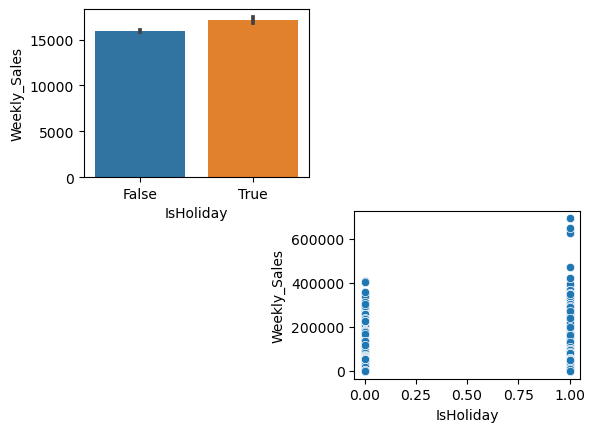

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
# plt.figure(figsize = (5, 4))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data = df)

plt.subplot(2, 2, 4)
# plt.figure(figsize = (5, 4))
sns.scatterplot(x='IsHoliday', y='Weekly_Sales', data = df)

In [244]:
df = df.loc[df['IsHoliday'] == True]
df['Date'].nunique()

10

<Axes: ylabel='Temperature'>

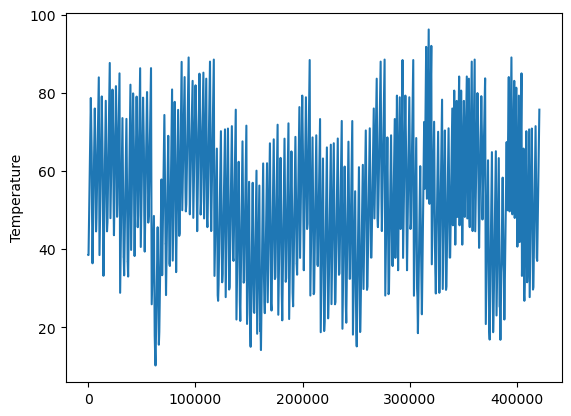

In [245]:
sns.lineplot(df['Temperature'])

MOVING AVERAGE STATISTICAL TECHNIQUE

In [246]:
mean1000 = df.Temperature.rolling(5000).mean()
mean1000

73              NaN
74              NaN
75              NaN
76              NaN
77              NaN
            ...    
421096    50.633224
421097    50.632776
421098    50.632328
421099    50.631880
421100    50.631432
Name: Temperature, Length: 29560, dtype: float64

<Axes: ylabel='Temperature'>

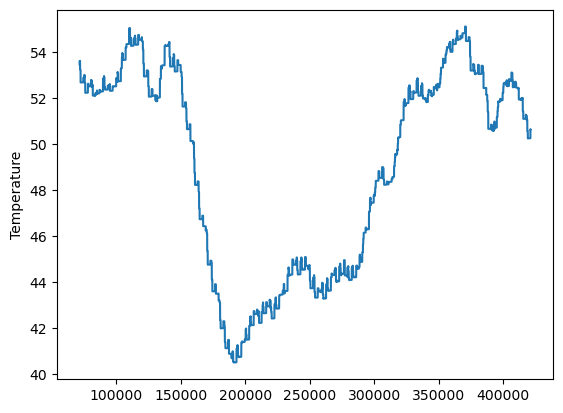

In [247]:
sns.lineplot(mean1000)

In [248]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [249]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [250]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [251]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

Text(0.5, 1.0, 'Labor_Day')

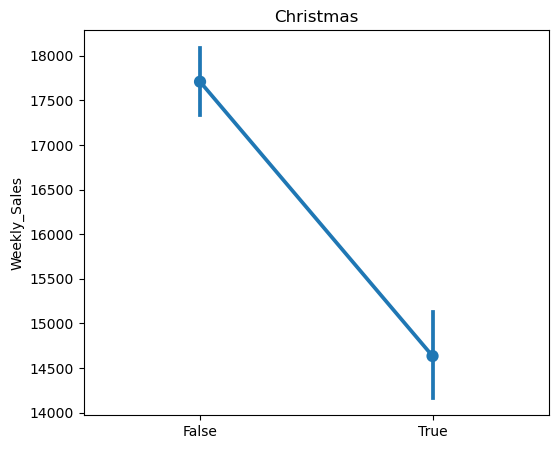

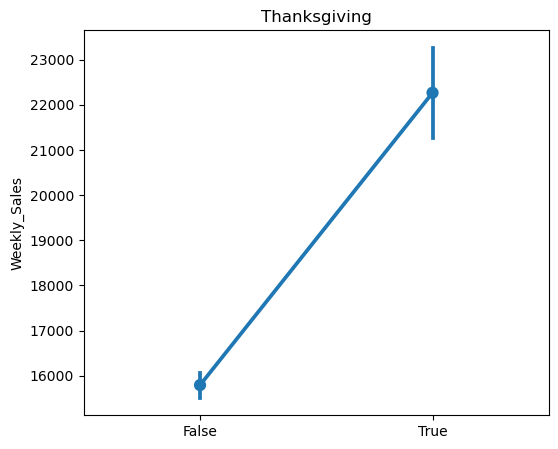

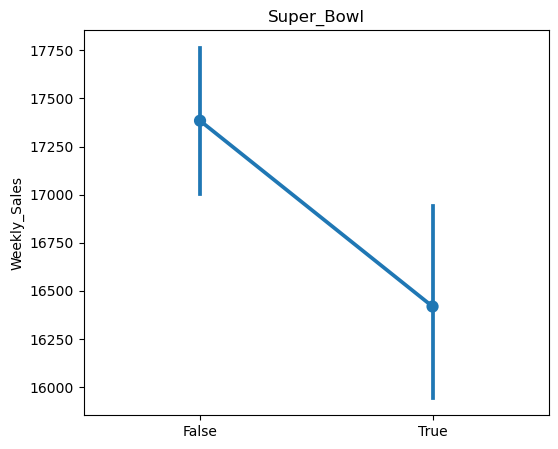

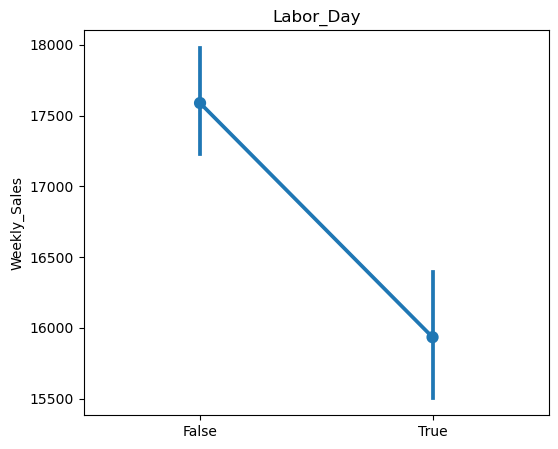

In [252]:
plt.figure(figsize = (6,5))
sns.pointplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas
plt.xlabel('')
plt.title('Christmas')

plt.figure(figsize = (6,5))
sns.pointplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving
plt.xlabel('')
plt.title('Thanksgiving')

plt.figure(figsize = (6,5))
sns.pointplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl
plt.xlabel('')
plt.title('Super_Bowl')

plt.figure(figsize = (6,5))
sns.pointplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day
plt.xlabel('')
plt.title('Labor_Day')

In [254]:
df.groupby(['Christmas', 'Type'])['Weekly_Sales'].mean()

Christmas  Type
False      A       22086.704811
           B       13907.221817
           C        9950.823668
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [255]:
df.groupby(['Thanksgiving', 'Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
False         A       19809.788703
              B       12079.193977
              C        9532.761545
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [256]:
df.groupby(['Labor_Day', 'Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       21900.694220
           B       13990.217932
           C        9424.358896
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [257]:
df.groupby(['Super_Bowl', 'Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       21641.908956
            B       13834.337181
            C        9304.702301
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

In [258]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
True    17094.300918
Name: Weekly_Sales, dtype: float64

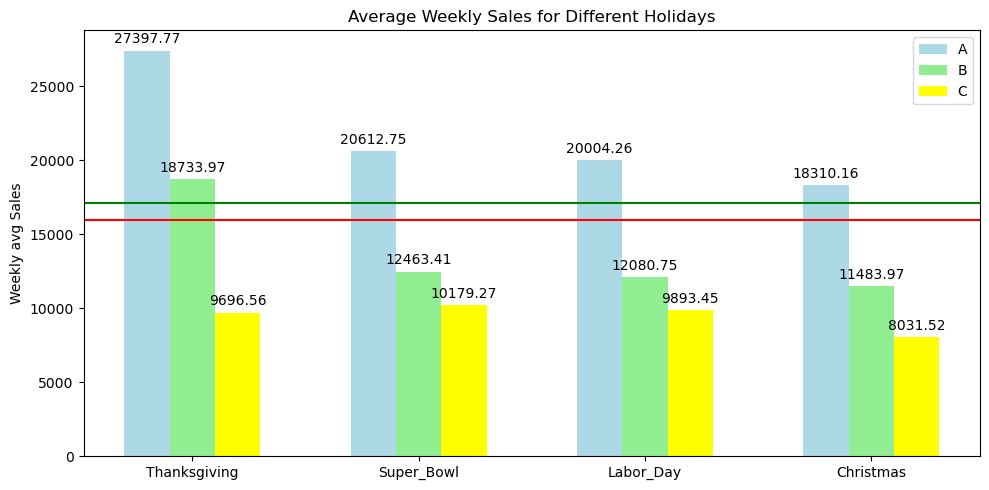

In [259]:
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

size = np.arange(len(labels))
w = 0.20

fig, ax = plt.subplots(figsize = (10, 5))
Aplt = ax.bar(size-w, A_means, w, label = 'A', color = 'lightblue')
Bplt = ax.bar(size, B_means, w, label = 'B', color = 'lightgreen')
Cplt = ax.bar(size+w, C_means, w, label = 'C', color = 'yellow')

ax.set_ylabel('Weekly avg Sales')
ax.set_title('Average Weekly Sales for Different Holidays')
ax.set_xticks(size)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(Cplt)
autolabel(Bplt)
autolabel(Aplt)

plt.axhline(y=17094.30,color='g') # holidays avg
plt.axhline(y=15952.82,color='r') # not-holiday avg

fig.tight_layout()

plt.show()

In [260]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)
#Thank giving has highest sales

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsHoliday,Super_Bowl,Labor_Day,Thanksgiving,Christmas
90645,10,72,2010-11-26,693099.36,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,True,False,False,True,False
337053,35,72,2011-11-25,649770.18,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,True,False,False,True,False
94393,10,72,2011-11-25,630999.19,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,True,False,False,True,False
333594,35,72,2010-11-26,627962.93,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,True,False,False,True,False
131088,14,72,2010-11-26,474330.10,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,True,False,False,True,False


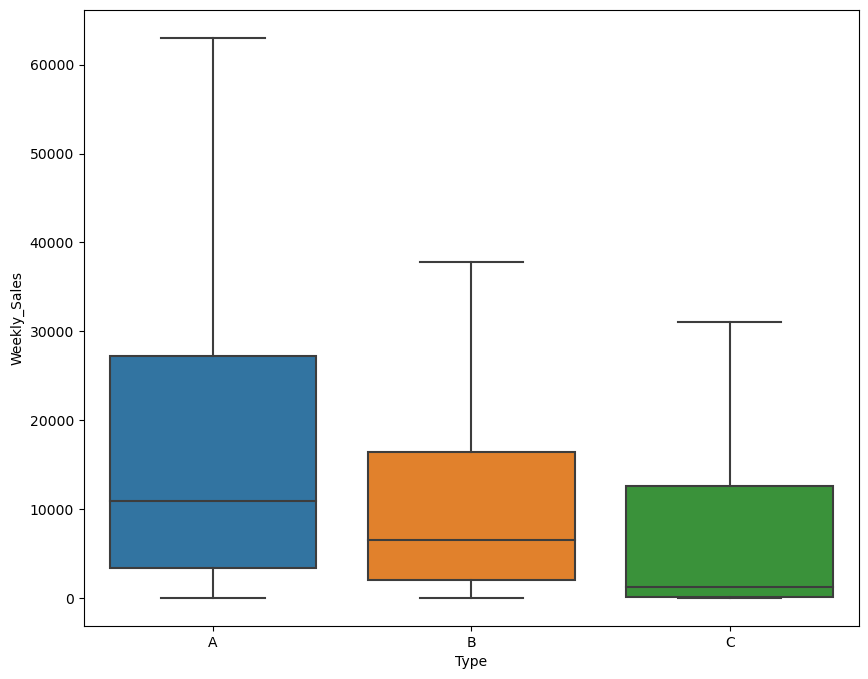

In [261]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=df, showfliers=False)

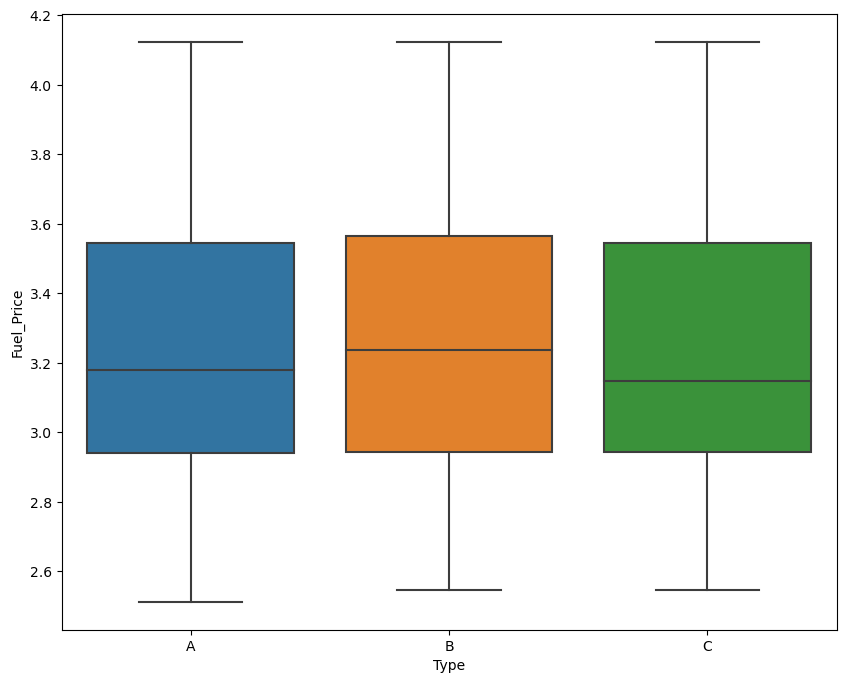

In [262]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Fuel_Price', data=df, showfliers=False)

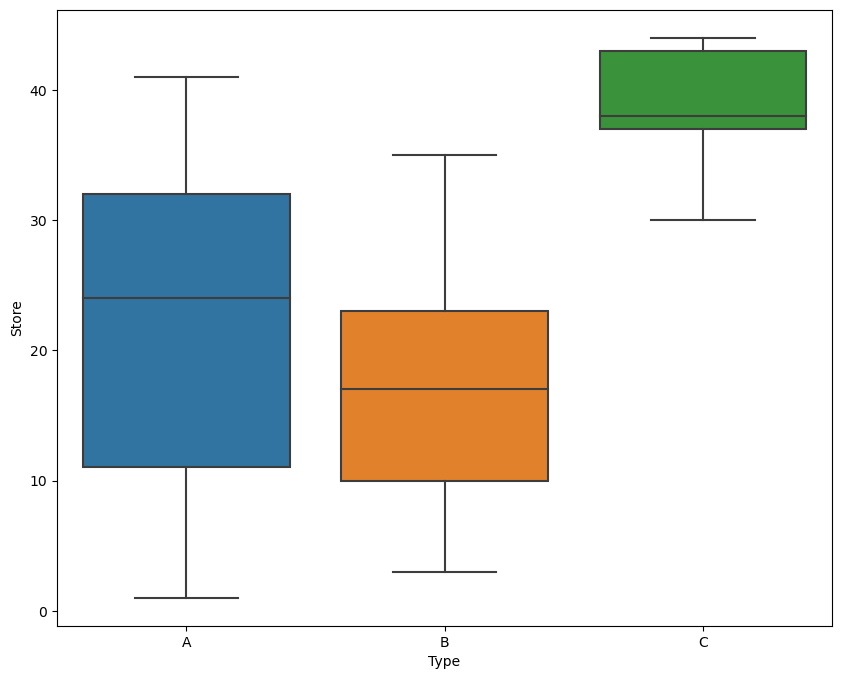

In [263]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Store', data=df, showfliers=False)

In [264]:
df.isna().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI             False
Unemployment    False
Type            False
Size            False
IsHoliday       False
Super_Bowl      False
Labor_Day       False
Thanksgiving    False
Christmas       False
dtype: bool

In [265]:
df.fillna(0, inplace = True)

In [266]:
df.isna().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
Type            False
Size            False
IsHoliday       False
Super_Bowl      False
Labor_Day       False
Thanksgiving    False
Christmas       False
dtype: bool

In [267]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,29560.000000,29560.000000,29560,29560.000000,29560.000000,29560.000000,29560.000000,29560.000000,29560.000000,29560.000000,29560.000000,29560.000000,29560.000000,29560.000000
mean,22.171346,44.314817,2011-06-04 16:53:50.744248832,17094.300918,49.643760,3.230616,2512.935724,4705.362409,5834.975231,1248.178417,1430.604822,170.937287,8.031520,136926.346685
min,1.000000,1.000000,2010-02-12 00:00:00,0.010000,10.240000,2.513000,0.000000,-9.980000,0.000000,0.000000,0.000000,126.114581,4.077000,34875.000000
25%,11.000000,18.000000,2010-11-26 00:00:00,2124.397500,33.000000,2.943000,0.000000,0.000000,0.000000,0.000000,0.000000,131.586613,6.986000,93638.000000
50%,22.000000,37.000000,2011-09-09 00:00:00,7999.345000,47.300000,3.181000,0.000000,0.000000,0.000000,0.000000,0.000000,182.571448,7.872000,140167.000000
75%,33.000000,74.000000,2011-12-30 00:00:00,21258.467500,67.090000,3.546000,2463.160000,65.000000,66.080000,272.510000,2069.300000,211.748433,8.622000,202505.000000
max,45.000000,99.000000,2012-09-07 00:00:00,693099.360000,96.220000,4.124000,36778.650000,104519.540000,141630.610000,29483.810000,11100.550000,226.210354,14.313000,219622.000000
std,12.786046,30.558724,NaN,27250.045416,20.032036,0.406871,5020.255970,15268.715644,19978.387345,3517.447876,2428.857586,39.059509,1.865849,60963.930477


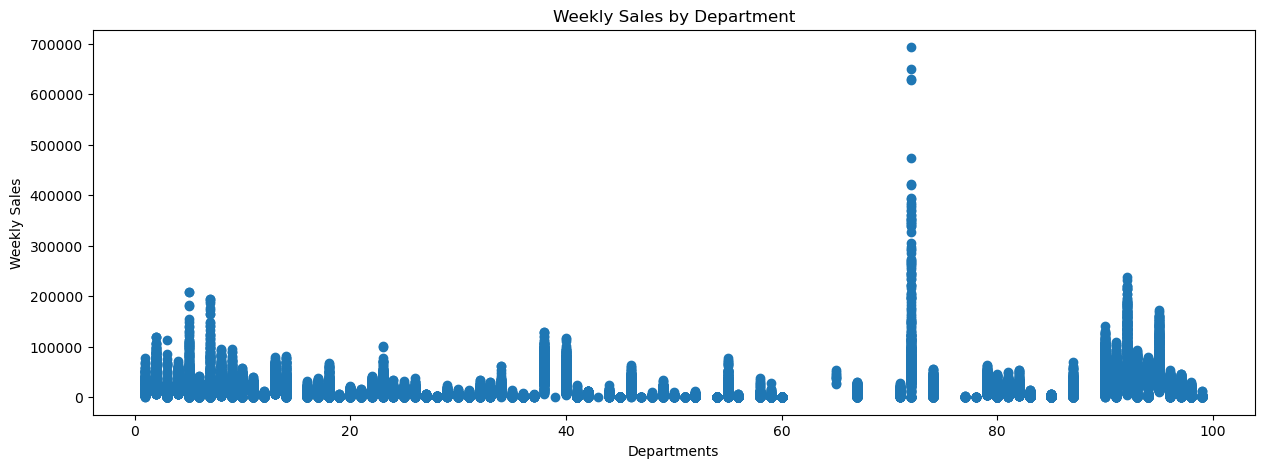

In [268]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '16'),
  Text(15, 0, '17'),
  Text(16, 0, '18'),
  Text(17, 0, '19'),
  Text(18, 0, '20'),
  Text(19, 0, '21'),
  Text(20, 0, '22'),
  Text(21, 0, '23'),
  Text(22, 0, '24'),
  Text(23, 0, '25'),
  Text(24, 0, '26'),
  Text(25, 0, '27'),
  Text(26, 0, '28'),
  Text(27, 0, '29'),
  Text(28, 0, '30'),
  Text(29, 0, '31'),
  Text(30, 0, '32'),
  

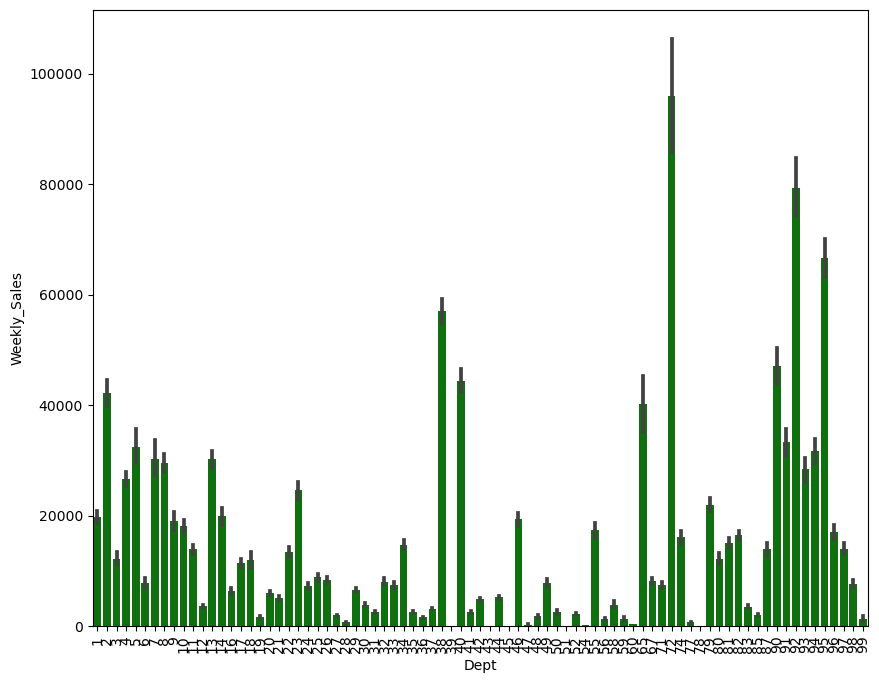

In [269]:
plt.figure(figsize=(10,8))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df, color = 'green')
plt.xticks(rotation = 90)

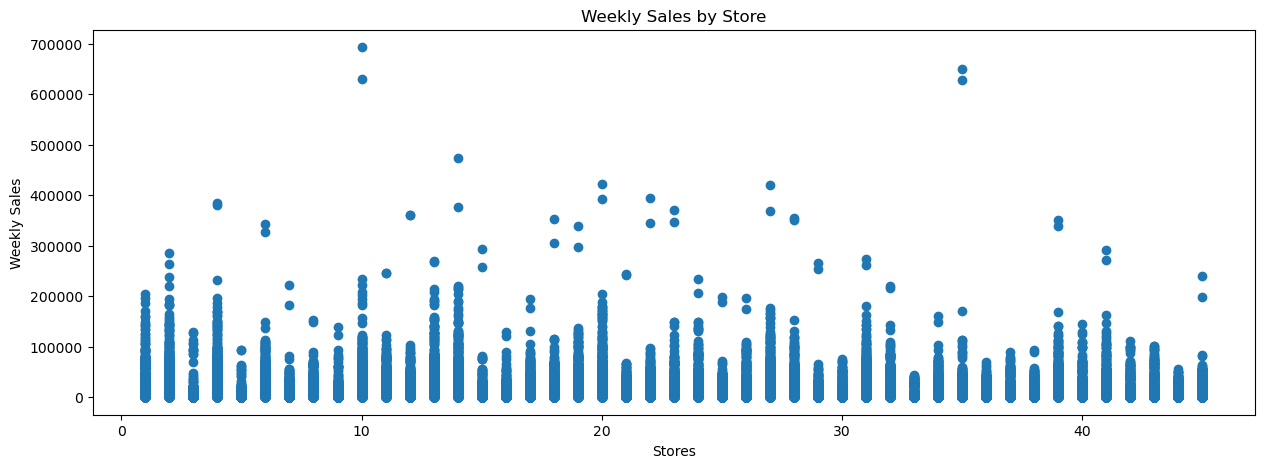

In [270]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, '36'),
  Text(36, 0, '37'),
  Text(37, 0, '38'),
  Text(38, 0, '

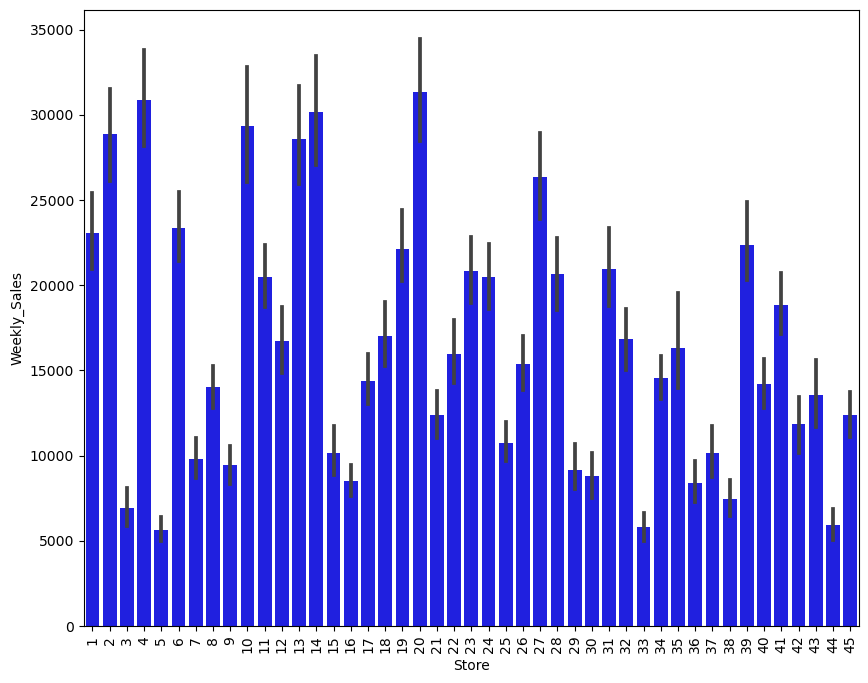

In [271]:
plt.figure(figsize=(10,8))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df, color = 'blue')
plt.xticks(rotation = 90)

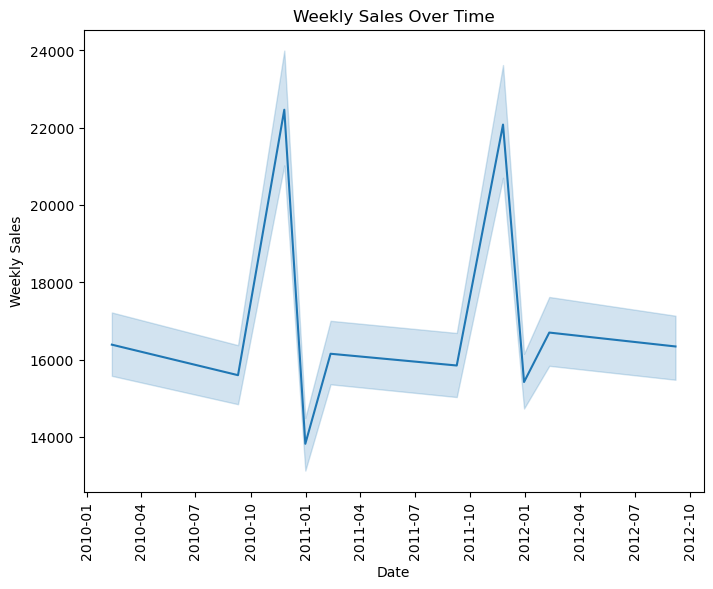

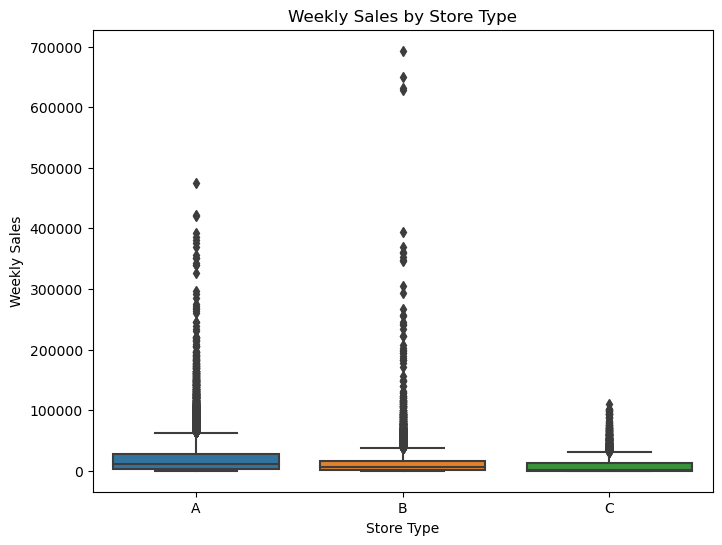

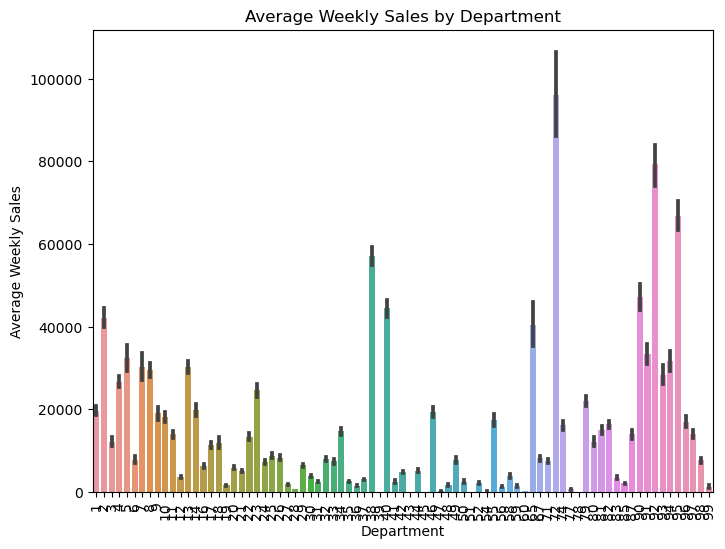

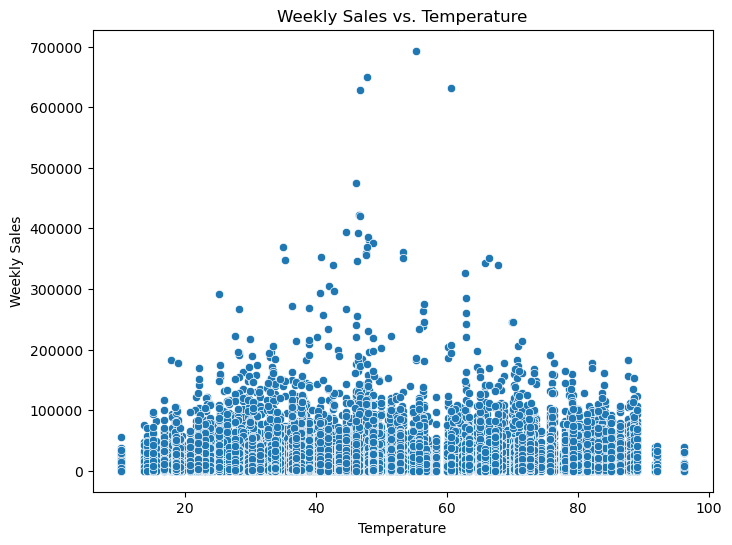

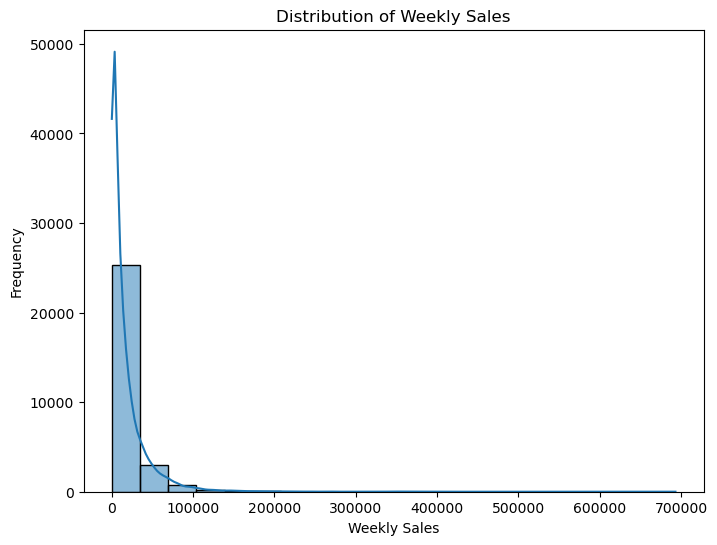

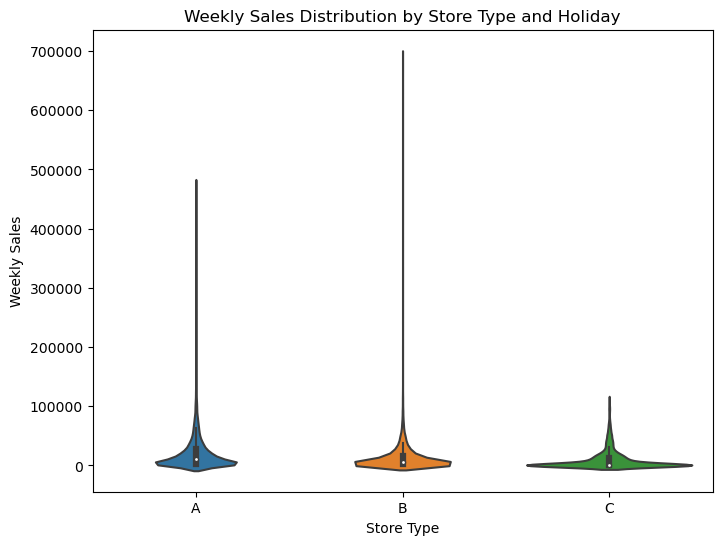

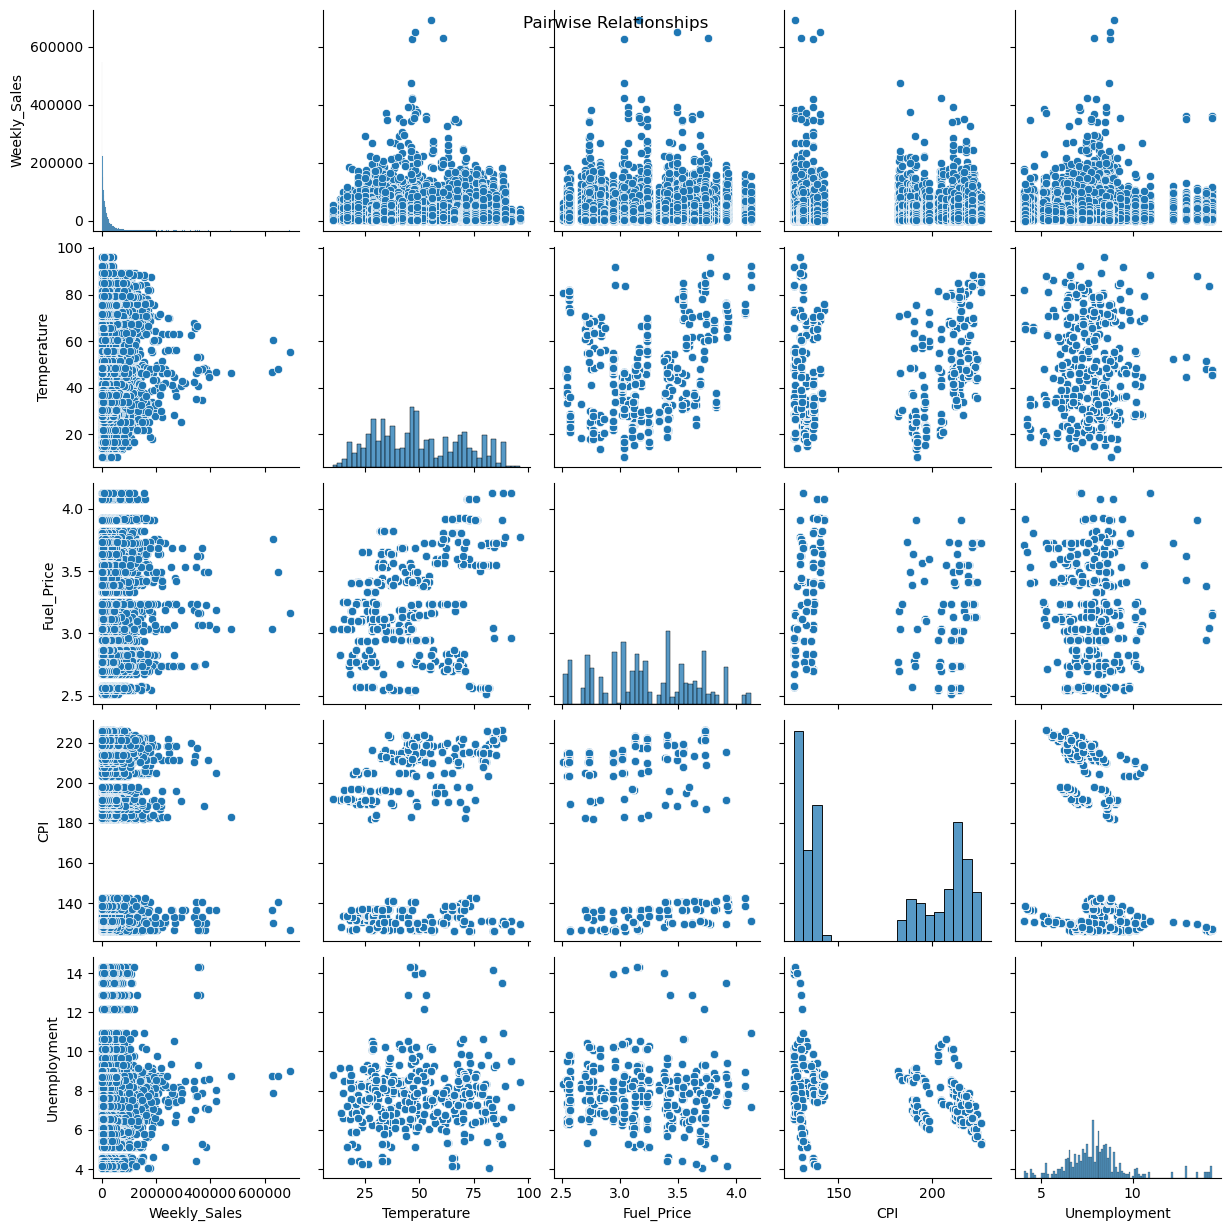

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line Plot - Weekly Sales over time
plt.figure(figsize=(8, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation = 90)
plt.show()

# Box Plot - Weekly Sales by Store Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

# Bar Plot - Average Weekly Sales by Department
plt.figure(figsize=(8, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=df, estimator='mean')
plt.title('Average Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation = 90)
plt.show()

# Scatter Plot - Weekly Sales vs. Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

# Histogram - Distribution of Weekly Sales
plt.figure(figsize=(8, 6))
sns.histplot(df['Weekly_Sales'], bins=20, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Violin Plot - Weekly Sales Distribution by Store Type and IsHoliday
plt.figure(figsize=(8, 6))
sns.violinplot(x='Type', y='Weekly_Sales', data=df, split=True)
plt.title('Weekly Sales Distribution by Store Type and Holiday')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

# Pair Plot - Pairwise Relationships between Numeric Variables
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.suptitle('Pairwise Relationships')
plt.show()


In [273]:
df['Date'] = pd.to_datetime(df['Date'])
df['week'] = df['Date'].dt.isocalendar().week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsHoliday,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
73,1,1,2010-02-12,46039.49,38.51,2.548,0.00,0.0,0.00,0.00,0.0,211.242170,8.106,A,151315,True,True,False,False,False,6,2,2010
74,1,2,2010-02-12,44682.74,38.51,2.548,0.00,0.0,0.00,0.00,0.0,211.242170,8.106,A,151315,True,True,False,False,False,6,2,2010
75,1,3,2010-02-12,10887.84,38.51,2.548,0.00,0.0,0.00,0.00,0.0,211.242170,8.106,A,151315,True,True,False,False,False,6,2,2010
76,1,4,2010-02-12,35351.21,38.51,2.548,0.00,0.0,0.00,0.00,0.0,211.242170,8.106,A,151315,True,True,False,False,False,6,2,2010
77,1,5,2010-02-12,29620.81,38.51,2.548,0.00,0.0,0.00,0.00,0.0,211.242170,8.106,A,151315,True,True,False,False,False,6,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421096,45,93,2012-09-07,3607.37,75.70,3.911,11024.45,12.8,52.63,1854.77,2055.7,191.577676,8.684,B,118221,True,False,True,False,False,36,9,2012
421097,45,94,2012-09-07,3938.63,75.70,3.911,11024.45,12.8,52.63,1854.77,2055.7,191.577676,8.684,B,118221,True,False,True,False,False,36,9,2012
421098,45,95,2012-09-07,52417.47,75.70,3.911,11024.45,12.8,52.63,1854.77,2055.7,191.577676,8.684,B,118221,True,False,True,False,False,36,9,2012
421099,45,97,2012-09-07,7426.19,75.70,3.911,11024.45,12.8,52.63,1854.77,2055.7,191.577676,8.684,B,118221,True,False,True,False,False,36,9,2012


In [274]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
2     16418.777595
9     15934.061154
11    22269.601768
12    14635.139843
Name: Weekly_Sales, dtype: float64

In [275]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best months for sales

year
2010    17072.661617
2011    17400.783947
2012    16525.062280
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Weekly Sales per Month')

<Figure size 600x400 with 0 Axes>

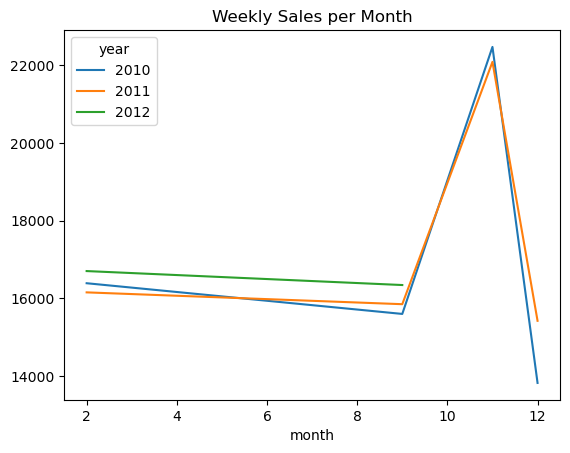

In [276]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
plt.figure(figsize = (6, 4))
monthly_sales.plot()
plt.title('Weekly Sales per Month')

In [277]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
47    22269.601768
6     16418.777595
36    15934.061154
52    14635.139843
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='week'>

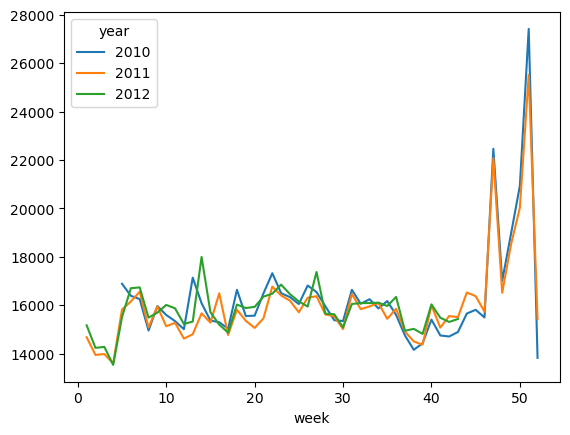

In [282]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

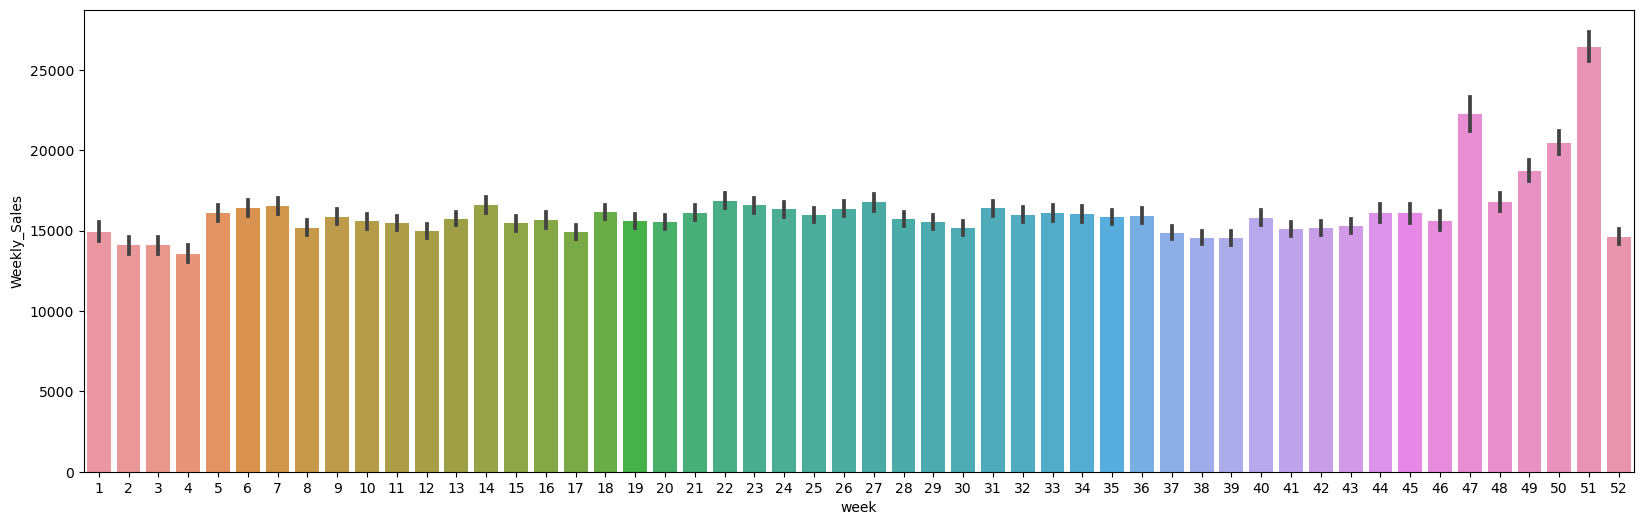

In [283]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

<Axes: xlabel='Fuel_Price'>

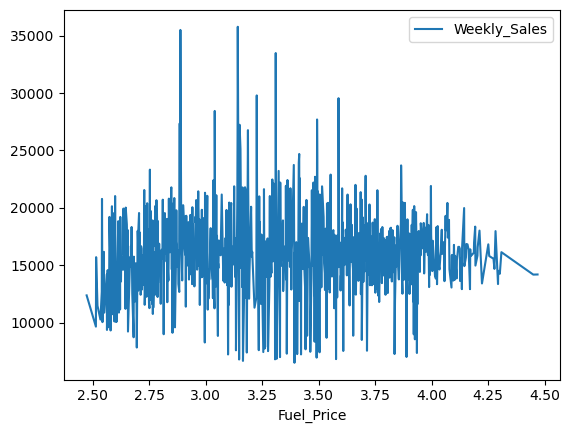

In [284]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='CPI'>

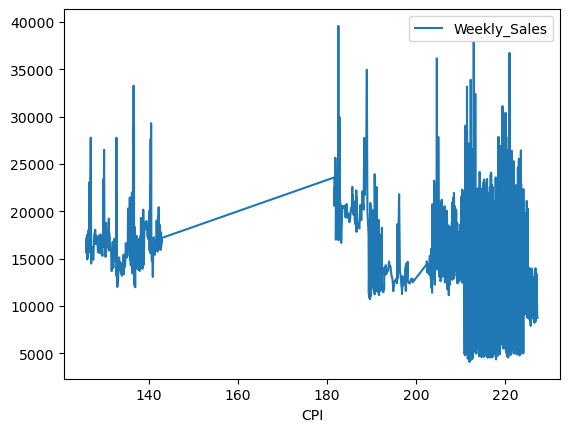

In [285]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
fuel_price.plot()

<Axes: xlabel='Unemployment'>

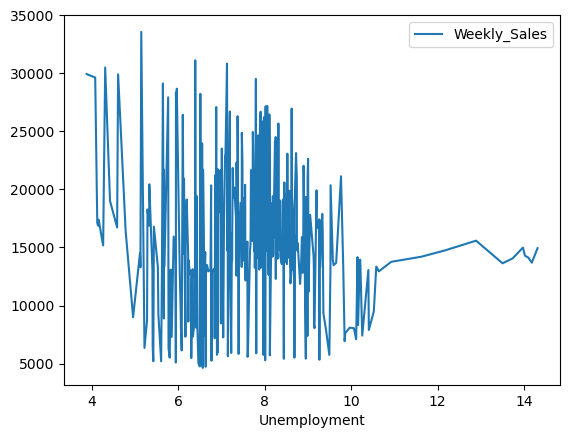

In [286]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
fuel_price.plot()

<Axes: xlabel='Temperature'>

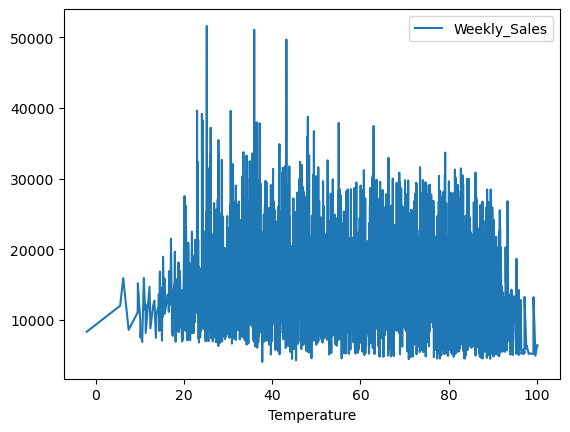

In [287]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
fuel_price.plot()

In [288]:
df.to_csv('clean_data.csv') # assign new data frame to csv for using after here

In [289]:
pd.options.display.max_columns=100 # to see columns 
df = pd.read_csv('clean_data.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df['Date'] = pd.to_datetime(df['Date']) # changing datetime to divide if needs
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [290]:
df_encoded = df.copy() # to keep original dataframe taking copy of it
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1
df_new = df_encoded.copy() # taking the copy of encoded df to keep it original

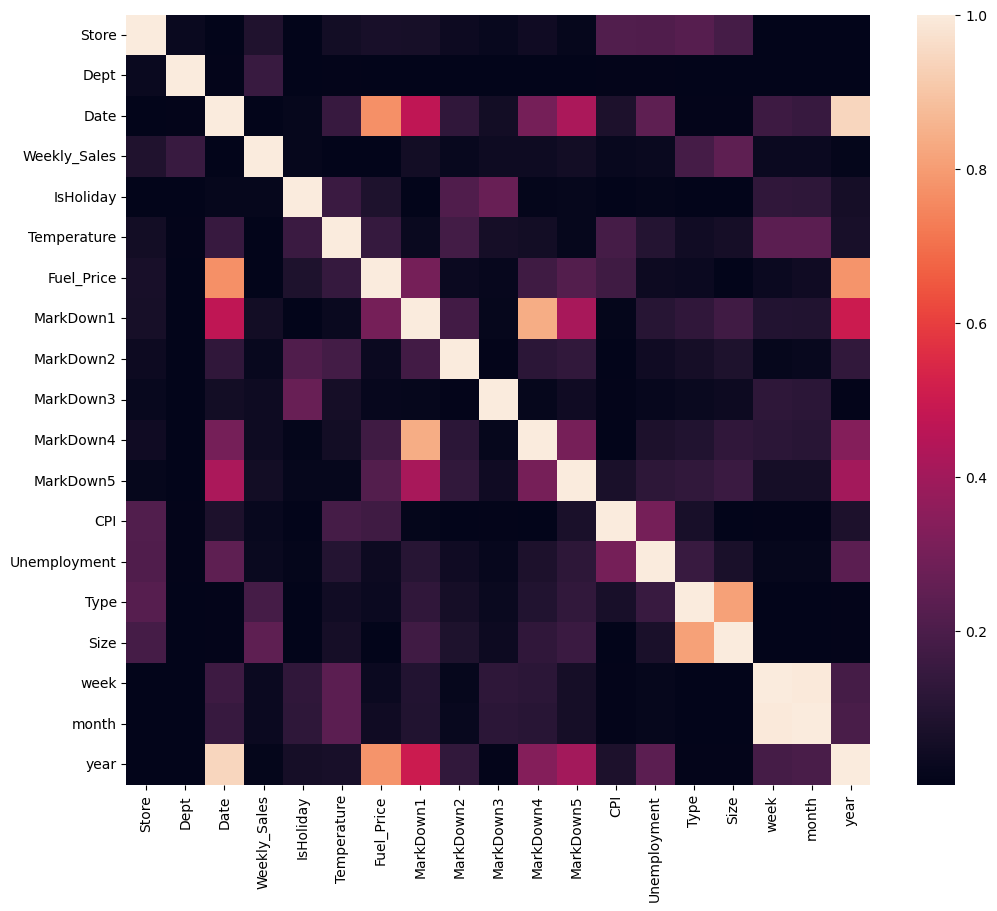

In [291]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations
plt.show()

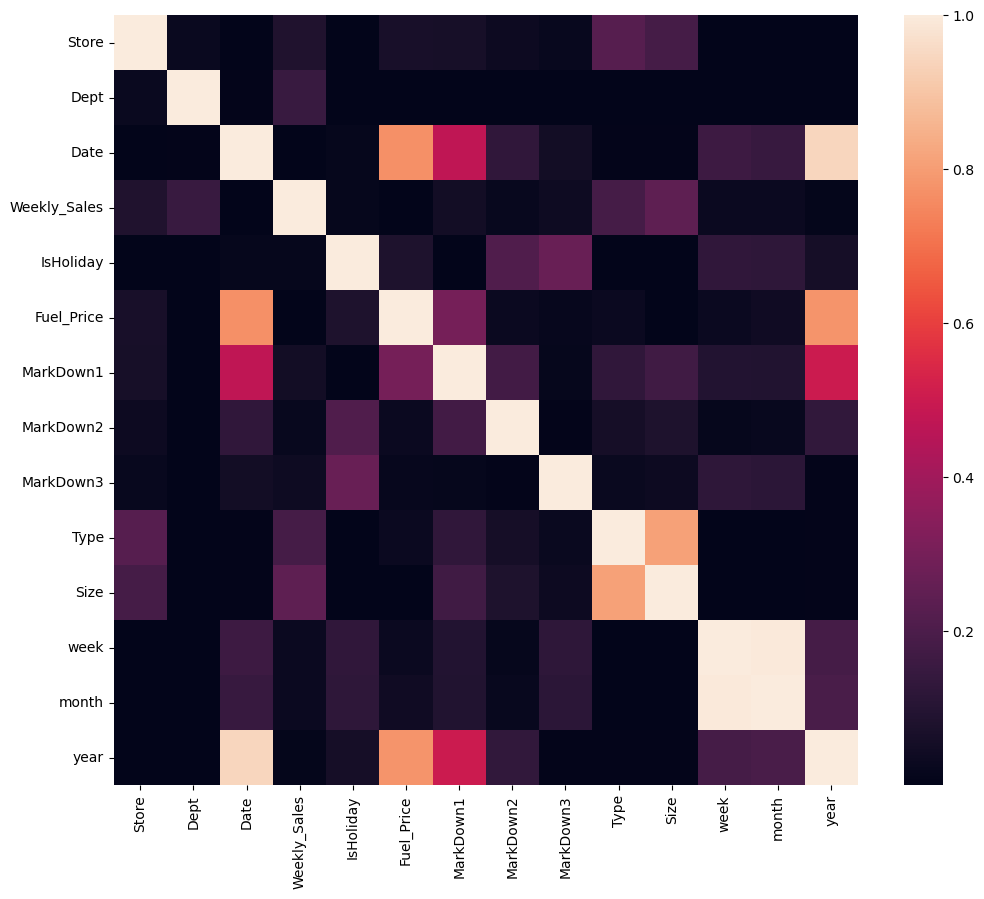

In [292]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations without dropping columns
plt.show()

In [293]:
df_new = df_new.sort_values(by='Date', ascending=True) # sorting according to date

In [294]:
train_data = df_new[:int(0.7*(len(df_new)))] # taking train part
test_data = df_new[int(0.7*(len(df_new))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [295]:
X = df_new[used_cols] # to keep train and test X values together

In [296]:
df_new

,Store,Dept,Date,Weekly_Sales,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
329781,35,3,2010-02-05,14612.19,0,2.784,0.00,0.00,0.0,2,103681,5,2,2010
329782,35,4,2010-02-05,26323.15,0,2.784,0.00,0.00,0.0,2,103681,5,2,2010
329783,35,5,2010-02-05,36414.63,0,2.784,0.00,0.00,0.0,2,103681,5,2,2010
329784,35,6,2010-02-05,11437.81,0,2.784,0.00,0.00,0.0,2,103681,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329722,34,14,2012-10-26,8930.71,0,3.514,1151.88,68.01,3.0,1,158114,43,10,2012
329723,34,16,2012-10-26,4841.81,0,3.514,1151.88,68.01,3.0,1,158114,43,10,2012
329724,34,17,2012-10-26,7035.13,0,3.514,1151.88,68.01,3.0,1,158114,43,10,2012
329726,34,20,2012-10-26,2124.60,0,3.514,1151.88,68.01,3.0,1,158114,43,10,2012


In [297]:
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

In [298]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [299]:
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


from arch import arch_model
from arch.univariate import ARX, GARCH, StudentsT, Normal

In [300]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

In [301]:
wmae_test(y_test, y_pred_test)

5850.444413125214

In [302]:
X = X.drop(['Date'], axis=1) #dropping date column from X

Feature ranking:
1. feature 1 (0.732822)
2. feature 8 (0.110390)
3. feature 0 (0.054027)
4. feature 7 (0.038210)
5. feature 9 (0.021277)
6. feature 3 (0.018402)
7. feature 10 (0.009446)
8. feature 6 (0.005523)
9. feature 4 (0.003413)
10. feature 5 (0.002776)
11. feature 2 (0.002246)
12. feature 11 (0.001467)


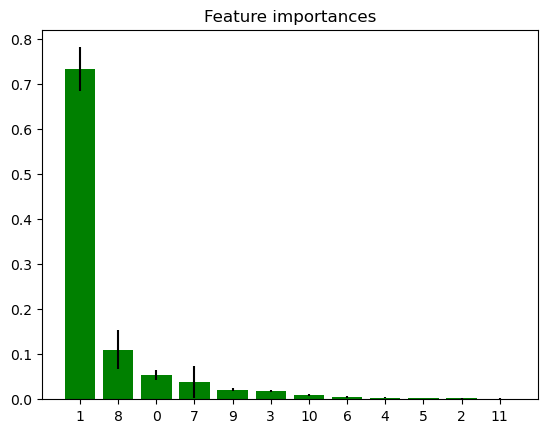

In [303]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="green", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [304]:
X1_train = X_train.drop(['month'], axis=1) # dropping month
X1_test = X_test.drop(['month'], axis=1)

In [305]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)

In [306]:
wmae_test(y_test, y_pred_test)

5494.419090545123

In [307]:
# splitting train-test to whole dataset
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]
# splitting train-test to whole dataset
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]
X_enc = df_encoded[used_cols1] # to get together train,test splits
X_enc = X_enc.drop(['Date'], axis=1) #dropping date column for whole X
X_train_enc = X_train_enc.drop(['Date'], axis=1) # dropping date from train and test
X_test_enc= X_test_enc.drop(['Date'], axis=1)
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)
# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)



Feature ranking:
1. feature 1 (0.743136)
2. feature 13 (0.075801)
3. feature 12 (0.043810)
4. feature 0 (0.031172)
5. feature 10 (0.028007)
6. feature 11 (0.017039)
7. feature 18 (0.012315)
8. feature 3 (0.011079)
9. feature 4 (0.009879)
10. feature 19 (0.005534)
11. feature 7 (0.004481)
12. feature 9 (0.003979)
13. feature 5 (0.003461)
14. feature 8 (0.003315)
15. feature 6 (0.002381)
16. feature 16 (0.001363)
17. feature 20 (0.001200)
18. feature 2 (0.000879)
19. feature 17 (0.000597)
20. feature 14 (0.000290)
21. feature 15 (0.000283)


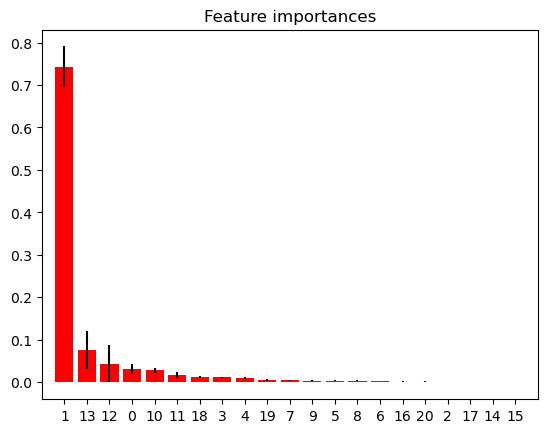

In [308]:
# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)
wmae_test(y_test_enc, y_pred_test_enc)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X_enc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_enc.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_enc.shape[1]), indices)
plt.xlim([-1, X_enc.shape[1]])
plt.show()

In [309]:
df_encoded_new = df_encoded.copy() # taking copy of encoded data to keep it without change.
df_encoded_new.drop(drop_col, axis=1, inplace=True)

In [310]:
#train-test splitting
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] # all columns except price

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

#droping date from train-test
X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)

In [311]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc1)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc1)

In [312]:
pipe.score(X_test_enc1,y_test_enc1)

0.7397036882771106

In [313]:
wmae_test(y_test_enc1, y_pred_test_enc)

1801.5211888667177

In [314]:
df_encoded_new1 = df_encoded.copy()
df_encoded_new1.drop(drop_col, axis=1, inplace=True)
df_encoded_new1 = df_encoded_new1.drop(['Date'], axis=1)
df_encoded_new1 = df_encoded_new1.drop(['month'], axis=1)
#train-test split
train_data_enc_new1 = df_encoded_new1[:int(0.7*(len(df_encoded_new1)))]
test_data_enc_new1 = df_encoded_new1[int(0.7*(len(df_encoded_new1))):]

target = "Weekly_Sales"
used_cols3 = [c for c in df_encoded_new1.columns.to_list() if c not in [target]] # all columns except price

X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]
#modeling part
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc2, y_train_enc2)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc2)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc2)
pipe.score(X_test_enc2,y_test_enc2)

0.7040151411780626

In [315]:
wmae_test(y_test_enc2, y_pred_test_enc)

2093.074731200826

In [316]:
df_results = pd.DataFrame(columns=["Model", "Info",'WMAE']) # result df for showing results together

In [317]:
new_data = pd.DataFrame({
    "Model": ['RandomForestRegressor'],
    "Info": ['w/out divided holiday columns'],
    "WMAE": [5850]
})


In [318]:
df_results = pd.concat([df_results, new_data], ignore_index=True)

In [319]:
new_rows = pd.DataFrame([
    {"Model": 'RandomForestRegressor', "Info": 'w/out month column', 'WMAE': 5494},
    {"Model": 'RandomForestRegressor', "Info": 'whole data', 'WMAE': 2450},
    {"Model": 'RandomForestRegressor', "Info": 'whole data with feature selection', 'WMAE': 1801},
    {"Model": 'RandomForestRegressor', "Info": 'whole data with feature selection w/out month', 'WMAE': 2093}
])

# Concatenate the new DataFrame to the existing df_results
df_results = pd.concat([df_results, new_rows], ignore_index=True)

In [320]:
df_results

,Model,Info,WMAE
0,RandomForestRegressor,w/out divided holiday columns,5850
1,RandomForestRegressor,w/out month column,5494
2,RandomForestRegressor,whole data,2450
3,RandomForestRegressor,whole data with feature selection,1801
4,RandomForestRegressor,whole data with feature selection w/out month,2093


In [321]:
df_new # to see my data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
329781,35,3,2010-02-05,14612.19,0,2.784,0.00,0.00,0.0,2,103681,5,2,2010
329782,35,4,2010-02-05,26323.15,0,2.784,0.00,0.00,0.0,2,103681,5,2,2010
329783,35,5,2010-02-05,36414.63,0,2.784,0.00,0.00,0.0,2,103681,5,2,2010
329784,35,6,2010-02-05,11437.81,0,2.784,0.00,0.00,0.0,2,103681,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329722,34,14,2012-10-26,8930.71,0,3.514,1151.88,68.01,3.0,1,158114,43,10,2012
329723,34,16,2012-10-26,4841.81,0,3.514,1151.88,68.01,3.0,1,158114,43,10,2012
329724,34,17,2012-10-26,7035.13,0,3.514,1151.88,68.01,3.0,1,158114,43,10,2012
329726,34,20,2012-10-26,2124.60,0,3.514,1151.88,68.01,3.0,1,158114,43,10,2012


In [322]:
df_new.set_index('Date', inplace=True) #seting date as index

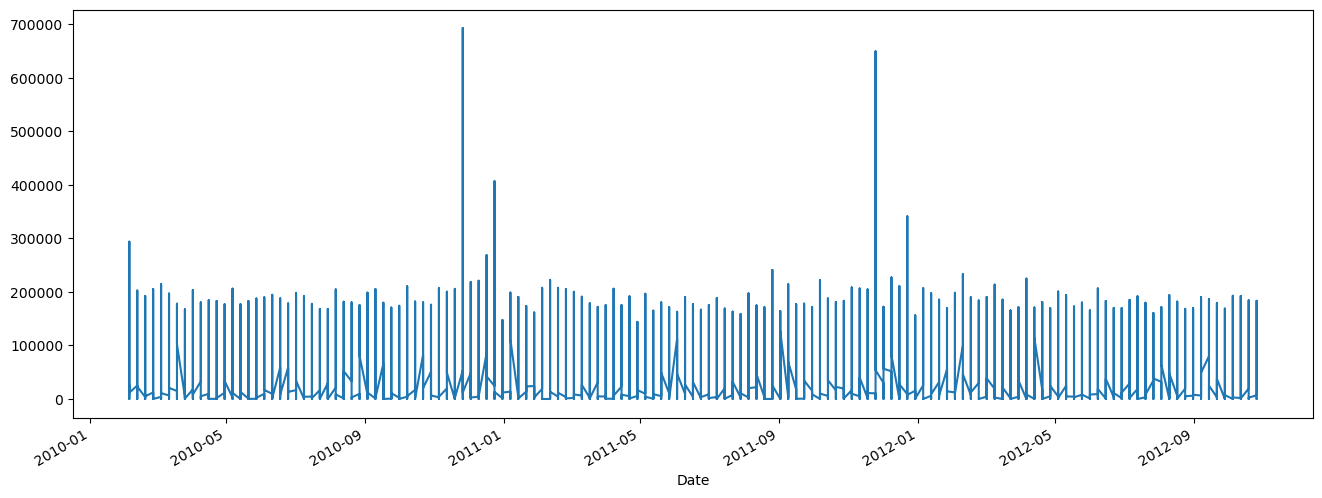

In [323]:
plt.figure(figsize=(16,6))
df_new['Weekly_Sales'].plot()
plt.show()

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2423.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:24:43   Log-Likelihood:            -4.8068e+06
No. Observations:              420212   AIC:                         9.614e+06
Df Residuals:                  420207   BIC:                         9.614e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.38e+04    328.718     41.989      

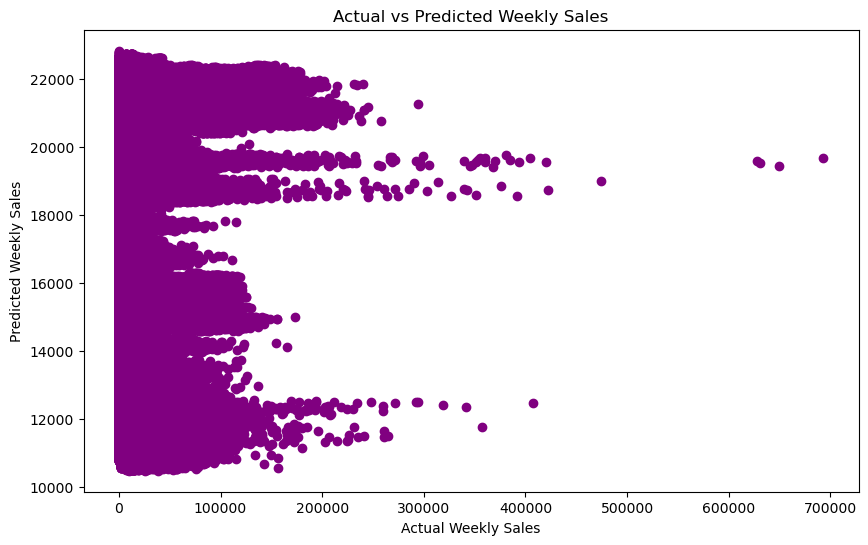

In [332]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Define the independent variables (with a constant term)
X = df[['Dept', 'Fuel_Price', 'Temperature', 'CPI']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Define the dependent variable
y = df['Weekly_Sales']

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression
summ = (model.summary())
print(summ)

# Plotting the relationship between actual and predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Weekly_Sales'], model.fittedvalues, color = 'purple')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.show()


In [333]:
df_week = df_new.resample('W').mean() #resample data as weekly

In [334]:
df_week

,Store,Dept,Weekly_Sales,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
Date,,,,,,,,,,,,,
2010-02-07,22.040394,44.161236,16887.602166,0.0,2.717968,0.000000,0.000000,0.000000,1.587916,137381.684997,5.0,2.0,2010.0
2010-02-14,22.006443,44.331638,16390.912208,1.0,2.695955,0.000000,0.000000,0.000000,1.584944,137675.080027,6.0,2.0,2010.0
2010-02-21,22.044444,44.287542,16255.185970,0.0,2.673506,0.000000,0.000000,0.000000,1.587879,137277.810101,7.0,2.0,2010.0
2010-02-28,22.021088,44.058844,14955.932194,0.0,2.685486,0.000000,0.000000,0.000000,1.587755,137365.977551,8.0,2.0,2010.0
2010-03-07,22.056199,44.019755,15964.821240,0.0,2.731923,0.000000,0.000000,0.000000,1.585831,137556.273161,9.0,3.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,22.227981,44.099932,14815.621125,0.0,3.858017,4895.531619,19.071321,5.247659,1.595190,136080.131775,39.0,9.0,2012.0
2012-10-07,22.250506,44.518543,16037.442175,0.0,3.848344,5044.741224,0.000000,19.995620,1.591032,136517.424140,40.0,10.0,2012.0
2012-10-14,22.203760,44.574018,15484.696200,0.0,3.896989,1956.173911,0.000000,16.775955,1.593488,136284.739846,41.0,10.0,2012.0


In [335]:
df = df_new.copy()

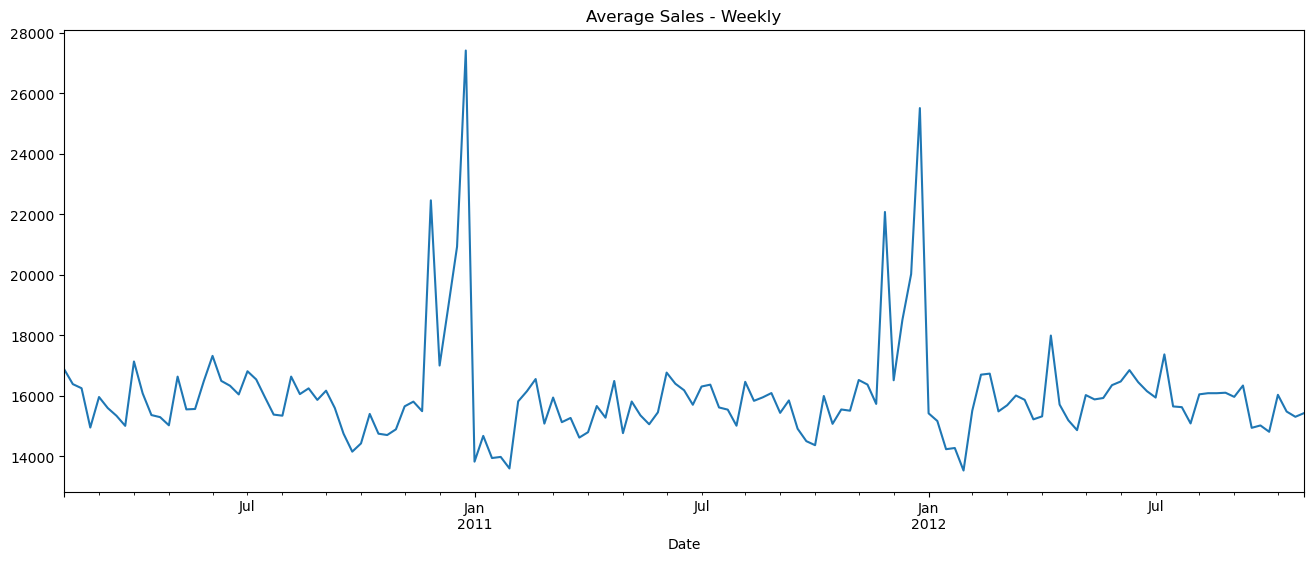

In [336]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [337]:
df_month = df.resample('MS').mean() # resampling as monthly

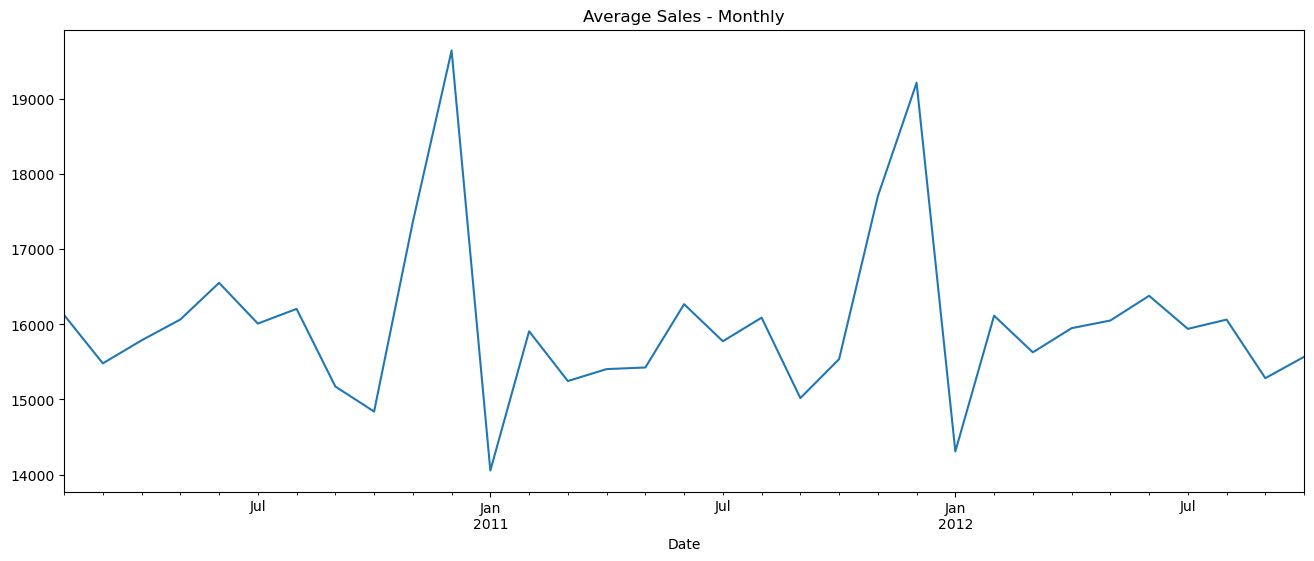

In [338]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

In [339]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

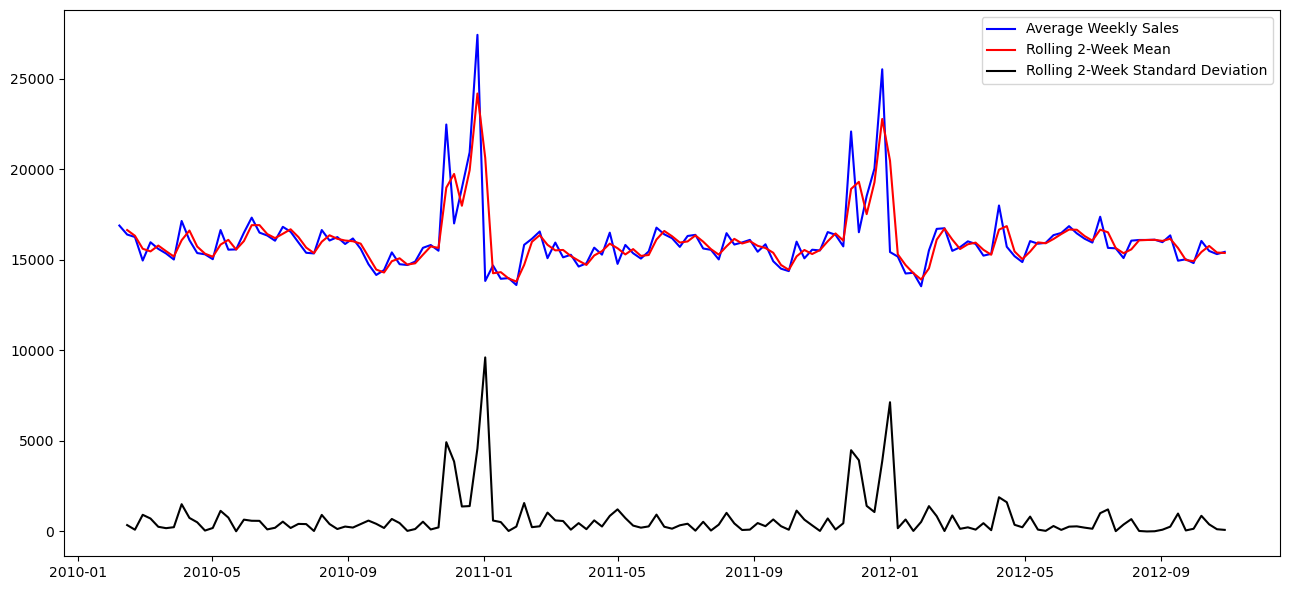

In [340]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [341]:
adfuller(df_week['Weekly_Sales'])

(-5.927107223737575,
 2.429049208204191e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

In [342]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 13)
Test: (43, 13)


In [343]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

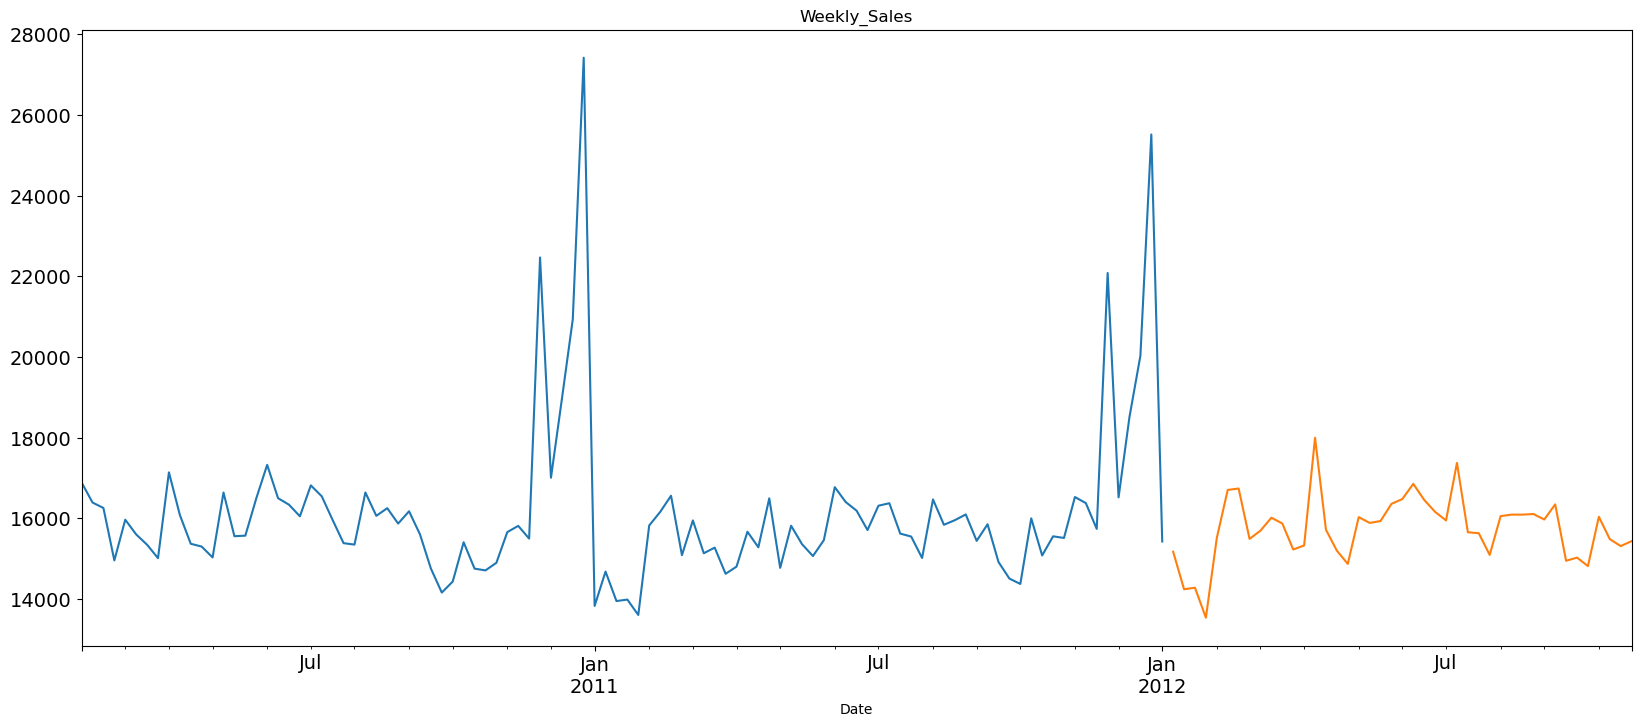

In [344]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [345]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

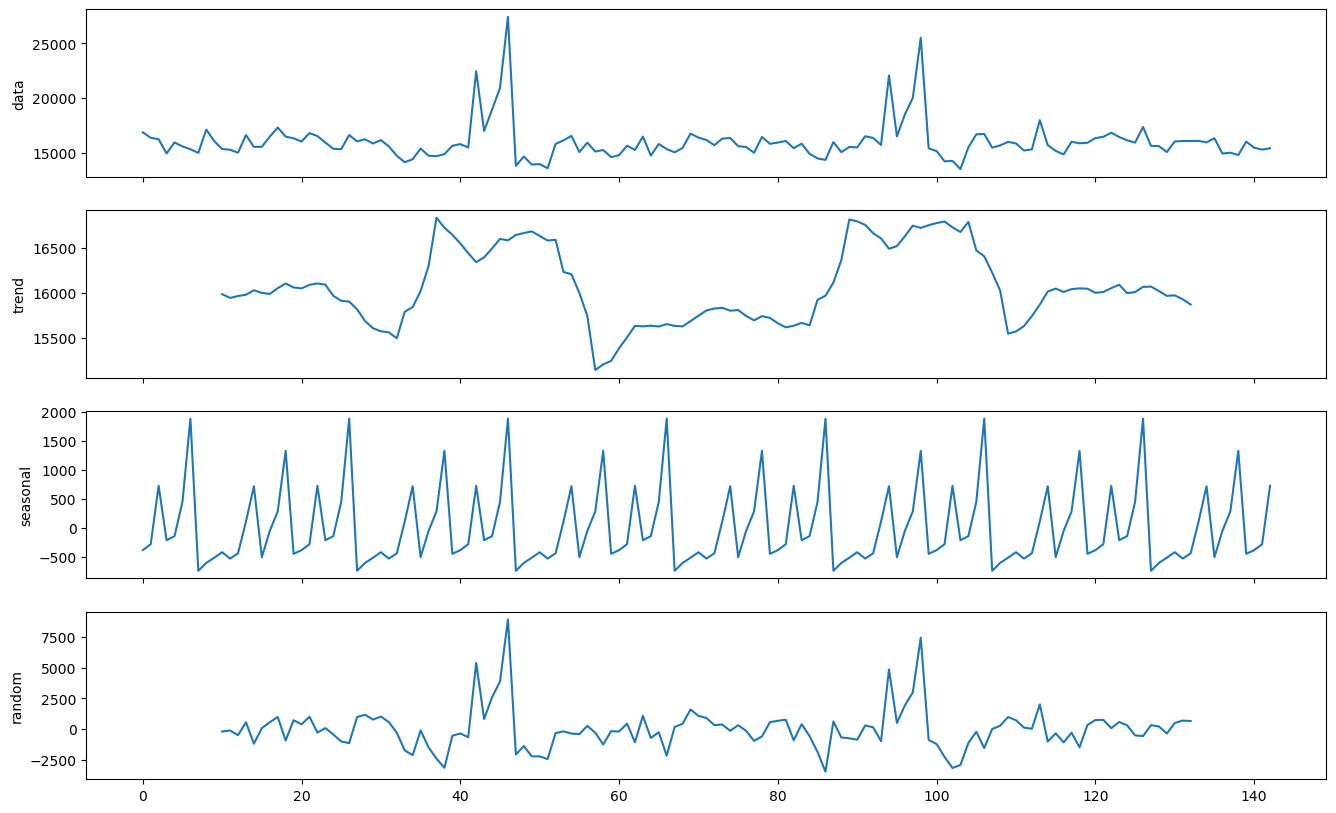

In [346]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

In [347]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [348]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

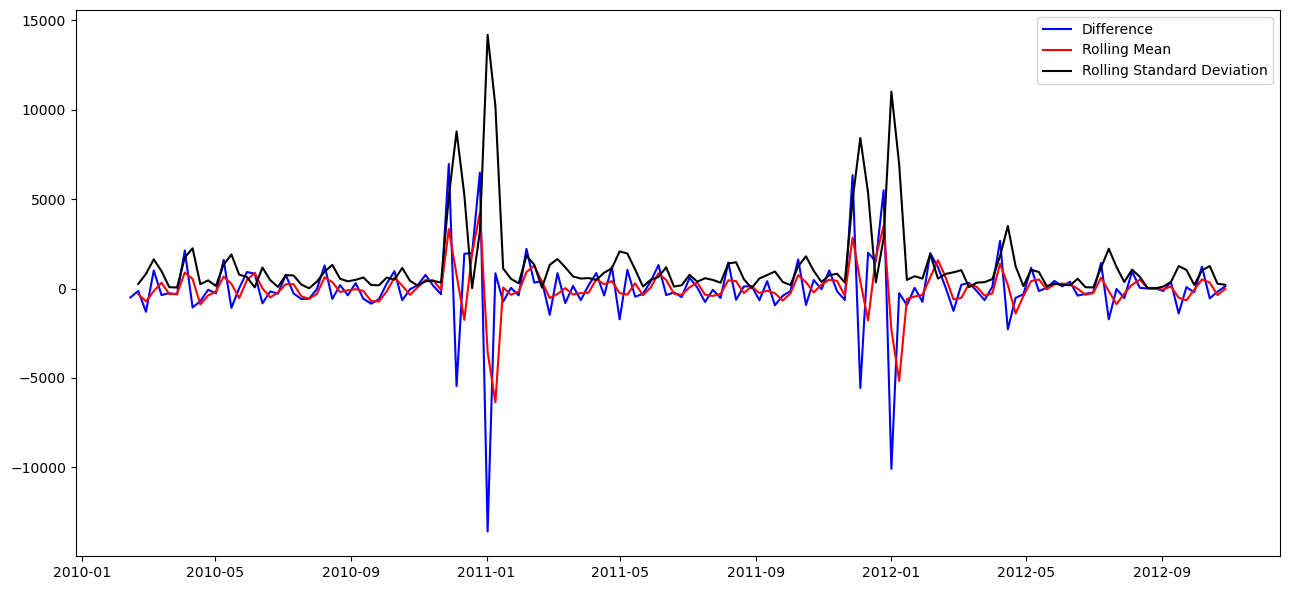

In [349]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [350]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [351]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

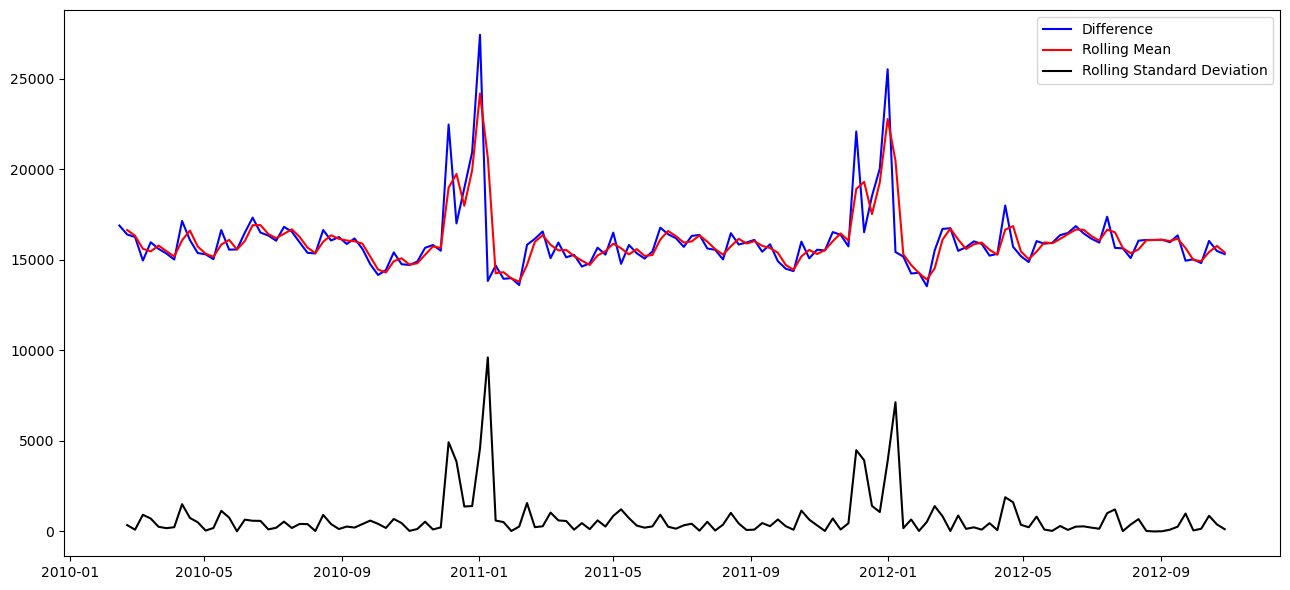

In [352]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [353]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [354]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

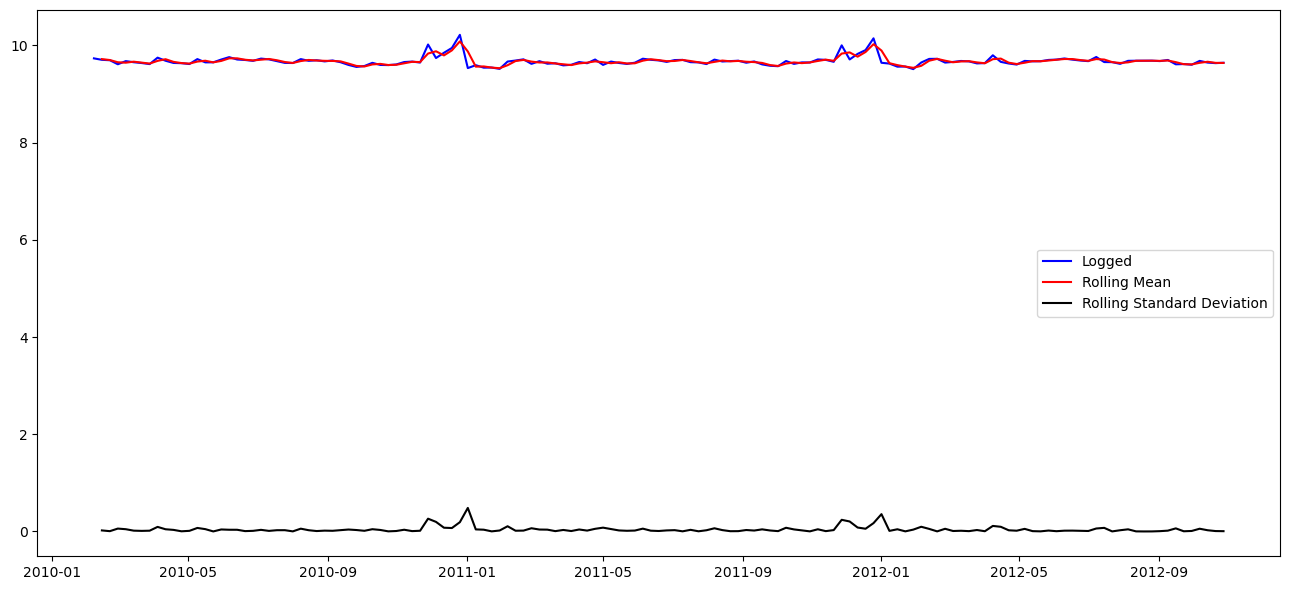

In [355]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# ARIMA MODEL


In [356]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [357]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.65 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.35 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

C:\Users\P.BHANU PRANASWI SAI\AppData\Local\Temp\ipykernel_16824\3168023129.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


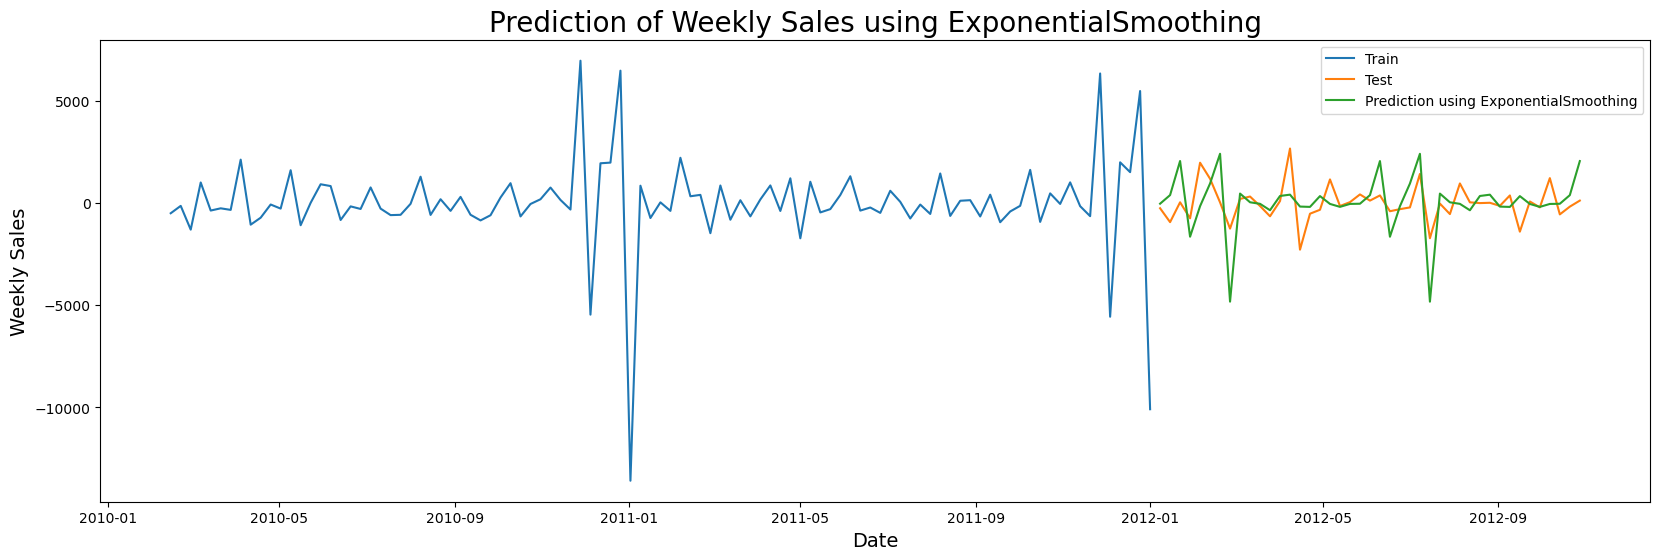

In [358]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [359]:
wmae_test(test_data_diff, y_pred)

840.6810609666959

In [360]:
am = arch_model(train_data_diff, vol='GARCH',power=1,o=1)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     34,   Neg. LLF: 889.1559928135421
Iteration:     10,   Func. Count:     66,   Neg. LLF: 874.1897378375418
Iteration:     15,   Func. Count:     96,   Neg. LLF: 870.8435414903911
Iteration:     20,   Func. Count:    126,   Neg. LLF: 870.6892793100373
Iteration:     25,   Func. Count:    156,   Neg. LLF: 870.6889826417881
Iteration:     30,   Func. Count:    186,   Neg. LLF: 870.6376234700218
Iteration:     35,   Func. Count:    216,   Neg. LLF: 868.6416717186883
Iteration:     40,   Func. Count:    245,   Neg. LLF: 868.6407966294462
Optimization terminated successfully    (Exit mode 0)
            Current function value: 868.6407965769641
            Iterations: 40
            Function evaluations: 245
            Gradient evaluations: 40
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared: 

C:\Users\P.BHANU PRANASWI SAI\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.808e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


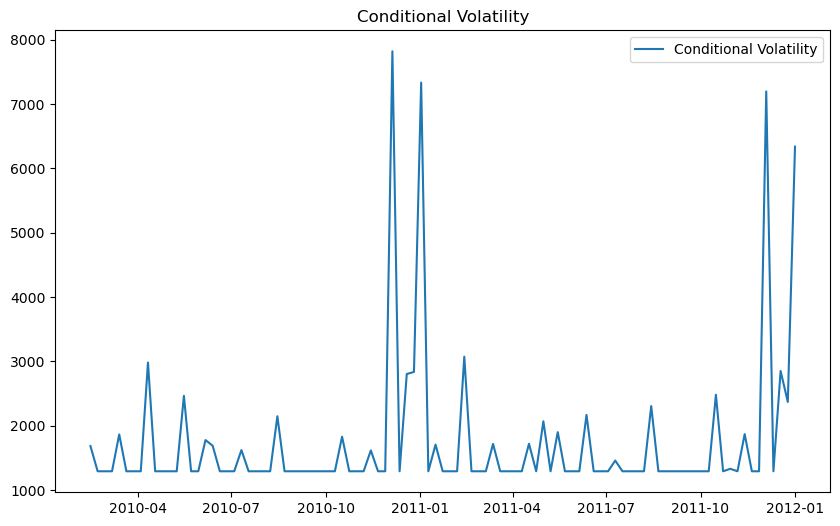

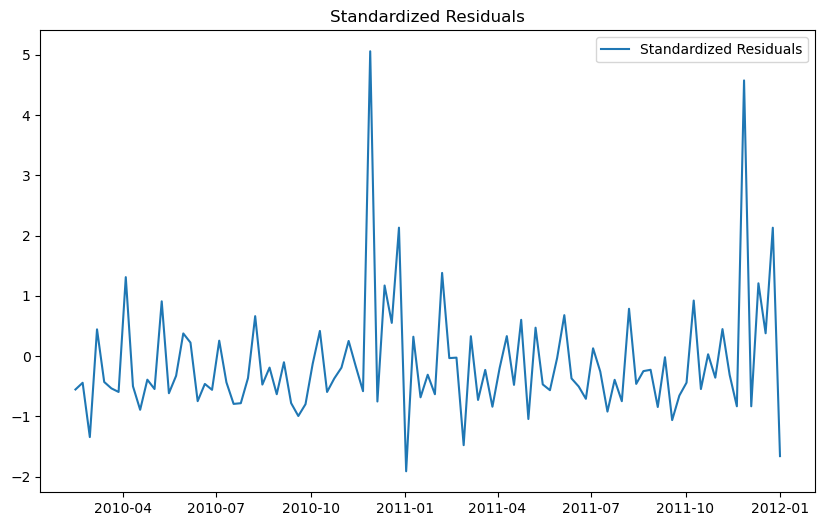

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


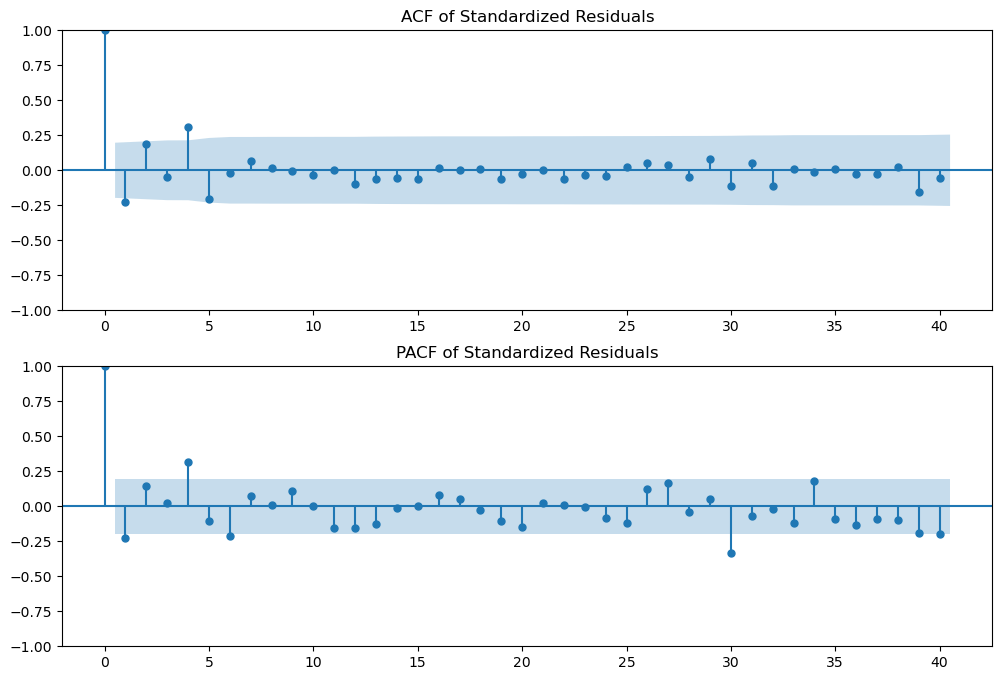

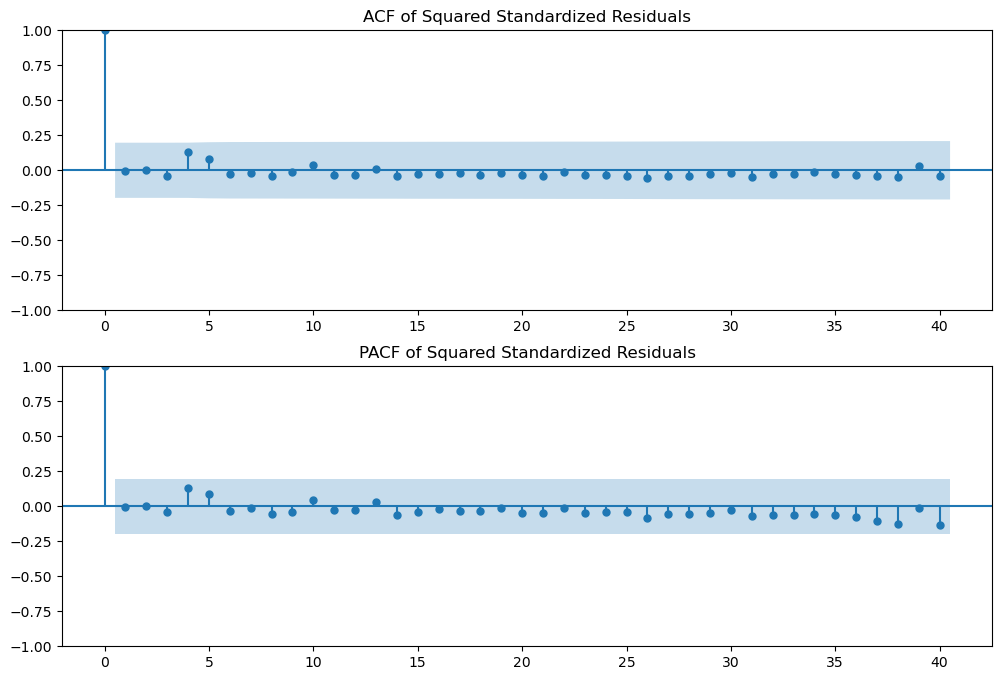

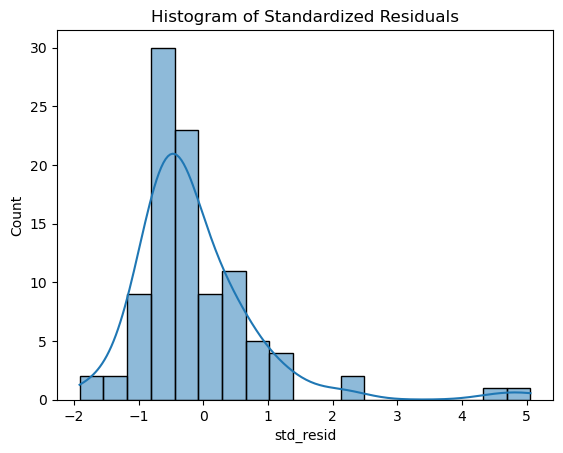

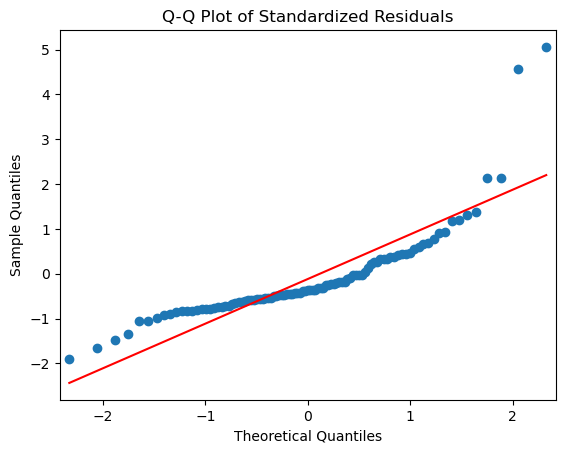

In [362]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plt.plot(res.conditional_volatility, label='Conditional Volatility')
plt.title('Conditional Volatility')
plt.legend()
plt.show()

# Plot standardized residuals
plt.figure(figsize=(10, 6))
plt.plot(res.std_resid, label='Standardized Residuals')
plt.title('Standardized Residuals')
plt.legend()
plt.show()

# ACF and PACF of standardized residuals
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(res.std_resid, ax=ax[0], lags=40, title='ACF of Standardized Residuals')
plot_pacf(res.std_resid, ax=ax[1], lags=40, title='PACF of Standardized Residuals')
plt.show()

# ACF and PACF of squared standardized residuals
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(res.std_resid**2, ax=ax[0], lags=40, title='ACF of Squared Standardized Residuals')
plot_pacf(res.std_resid**2, ax=ax[1], lags=40, title='PACF of Squared Standardized Residuals')
plt.show()

# Q-Q plot of standardized residuals
sns.histplot(res.std_resid, kde=True)
plt.title('Histogram of Standardized Residuals')
plt.show()

# Q-Q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(res.std_resid, line='s')
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()